# Financial Risk Analysis

![cover](cover.JPG)

## Data Overview

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  

df = pd.read_csv('financial_risk.csv')
print(df.head())

   Age      Gender Education Level Marital Status   Income  Credit Score  \
0   49        Male             PhD       Divorced  72799.0         688.0   
1   57      Female      Bachelor's        Widowed      NaN         690.0   
2   21  Non-binary        Master's         Single  55687.0         600.0   
3   59        Male      Bachelor's         Single  26508.0         622.0   
4   25  Non-binary      Bachelor's        Widowed  49427.0         766.0   

   Loan Amount Loan Purpose Employment Status  Years at Current Job  \
0      45713.0     Business        Unemployed                    19   
1      33835.0         Auto          Employed                     6   
2      36623.0         Home          Employed                     8   
3      26541.0     Personal        Unemployed                     2   
4      36528.0     Personal        Unemployed                    10   

  Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0            Poor              0.1543

In [2]:
# Remove all the warnings on python notebook

import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)


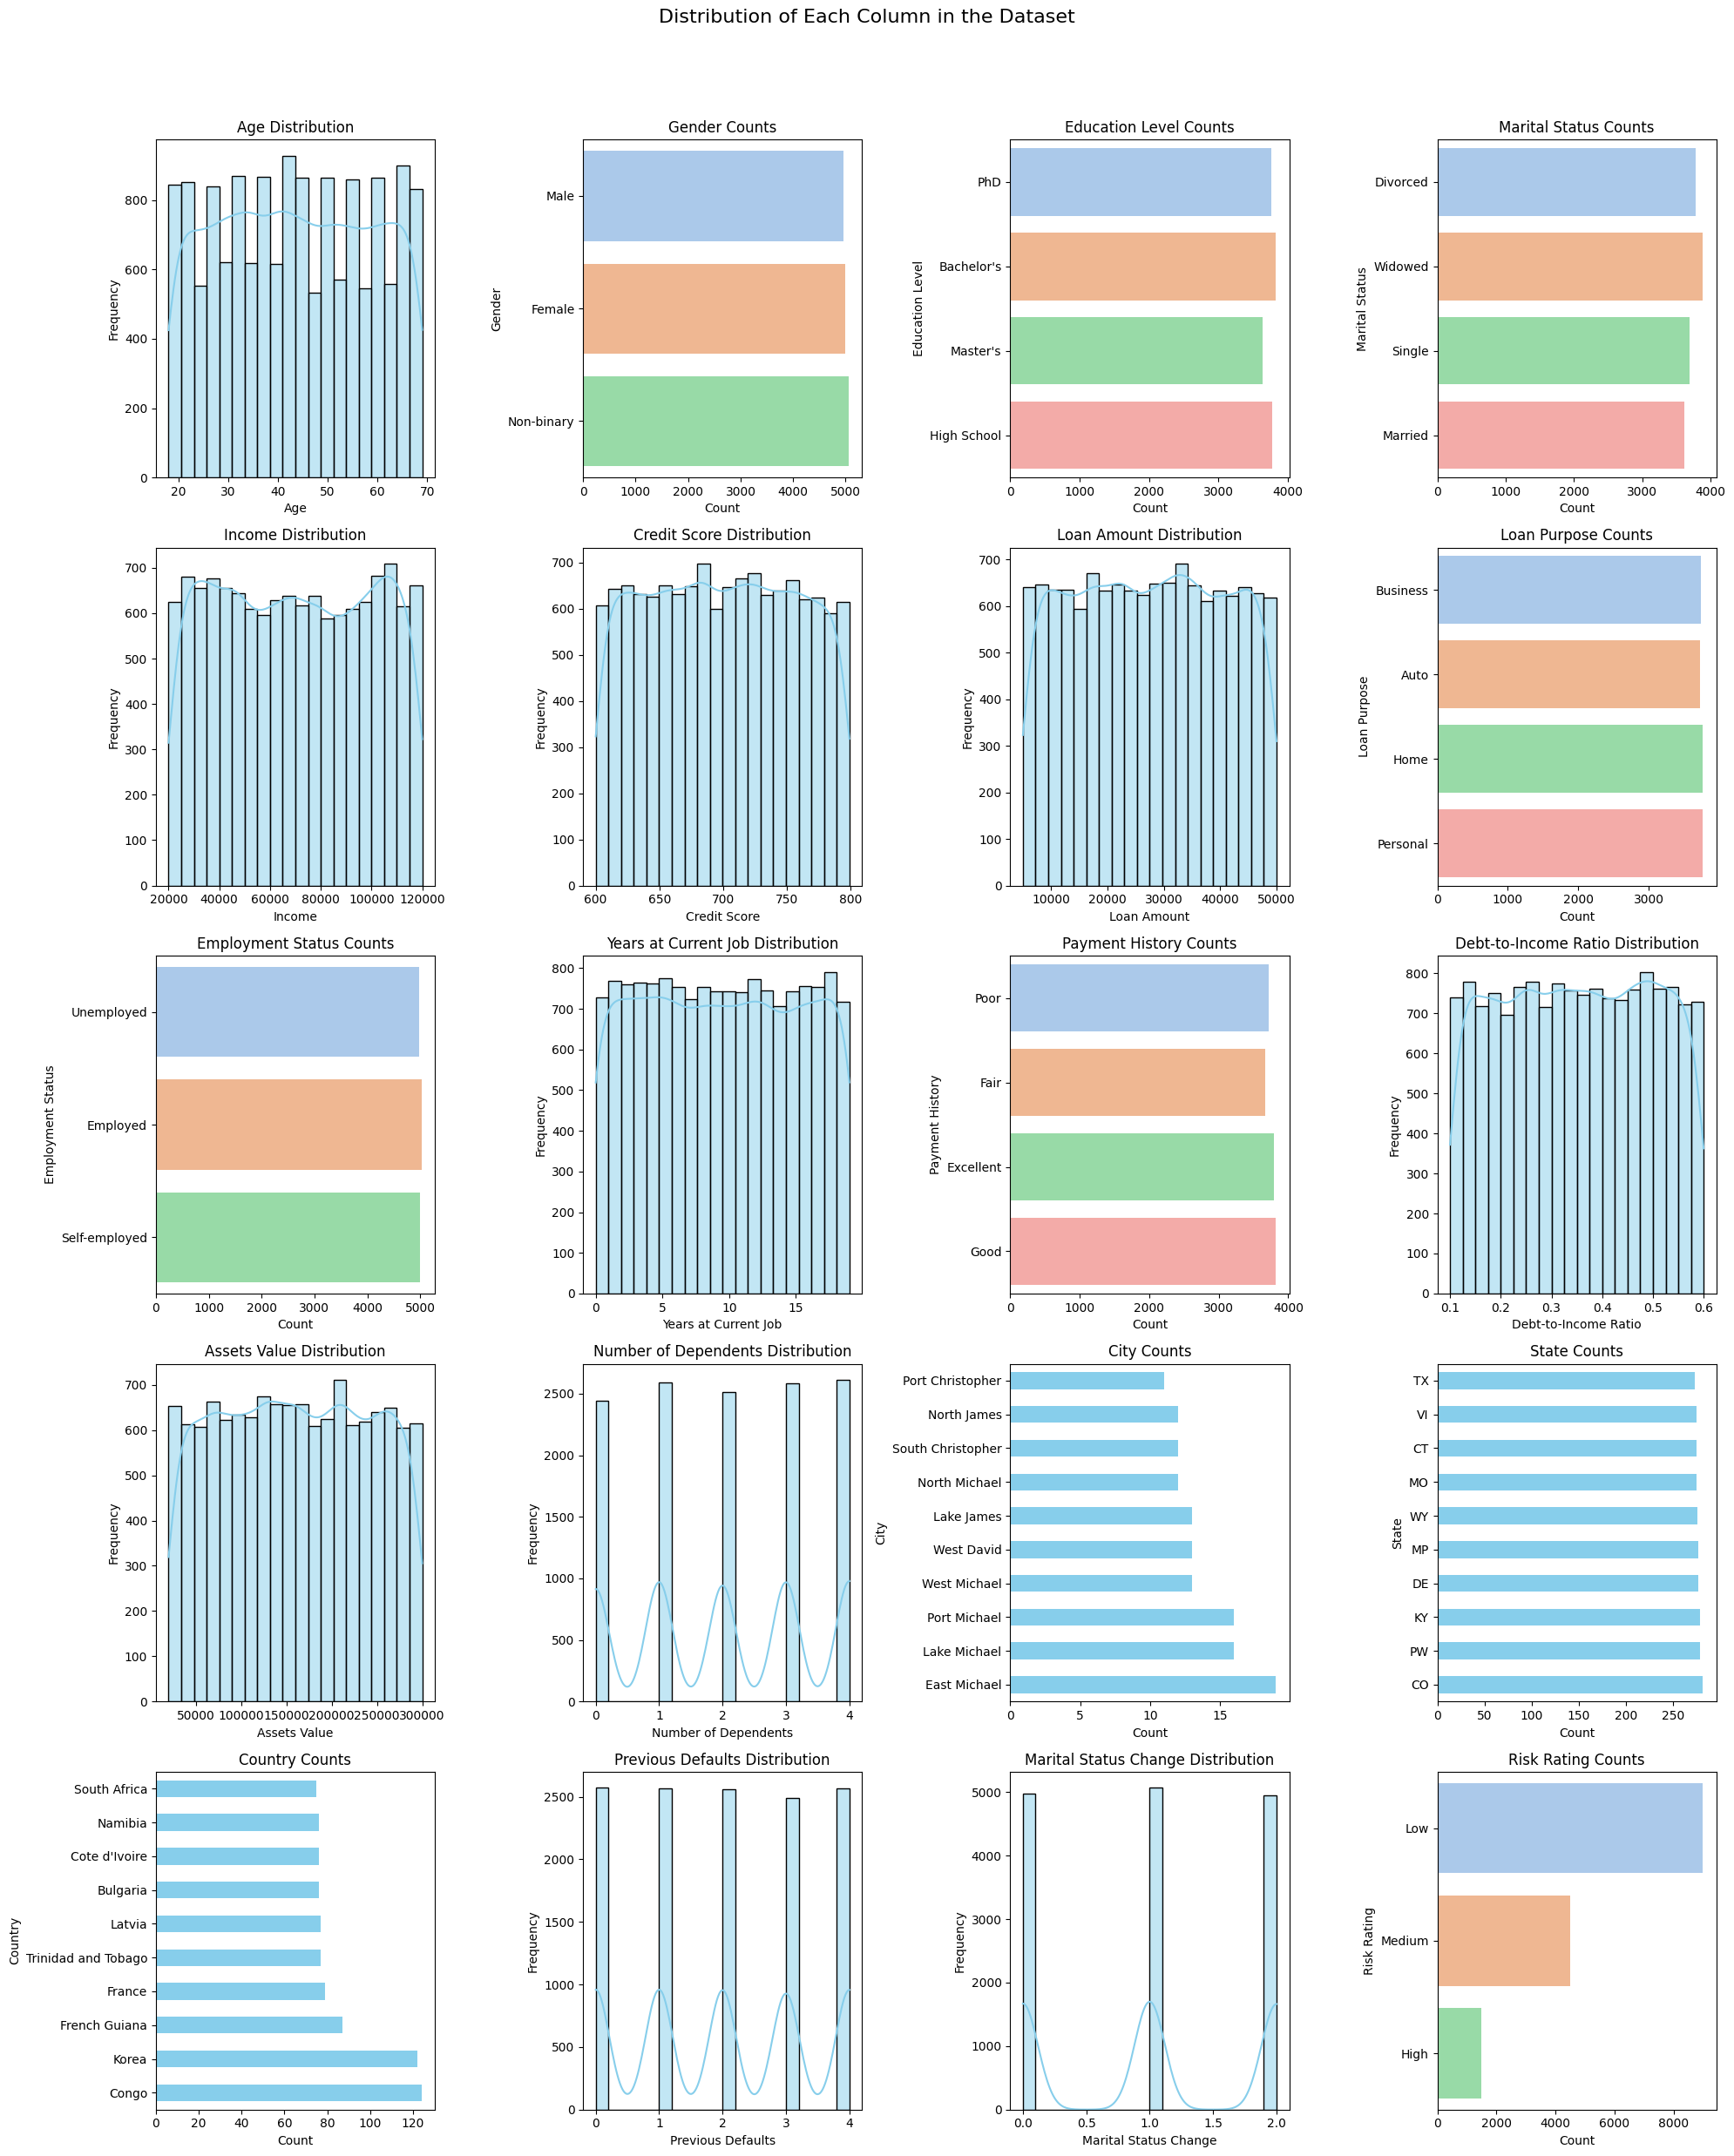

In [3]:

# Create figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 26))
fig.suptitle('Distribution of Each Column in the Dataset', fontsize=16)

columns = [
    'Age', 'Gender', 'Education Level', 'Marital Status', 'Income', 'Credit Score', 
    'Loan Amount', 'Loan Purpose', 'Employment Status', 'Years at Current Job', 
    'Payment History', 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 
    'City', 'State', 'Country', 'Previous Defaults', 'Marital Status Change', 'Risk Rating']

# Iterate over each column and plot them
for i, col in enumerate(columns):
    ax = axes[i // 4, i % 4]  # Determine position in the grid
    
    if pd.api.types.is_numeric_dtype(df[col]):
        # Histogram for numerical columns
        sns.histplot(df[col], bins=20, ax=ax, kde=True, color='skyblue')
        ax.set_title(f'{col} Distribution')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        
    else: 
        pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object'
        # Bar plot for categorical columns
        if df[col].nunique() <= 10:  # If the number of unique values is manageable
            sns.countplot(y=col, data=df, ax=ax, palette='pastel')
        else:
            df[col].value_counts().nlargest(10).plot(kind='barh', ax=ax, color='skyblue')
        ax.set_title(f'{col} Counts')
        ax.set_xlabel('Count')
        ax.set_ylabel(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [4]:
#data = data.dropna() 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [5]:
print(df.describe())

                Age         Income  Credit Score   Loan Amount  \
count  15000.000000   12750.000000  12750.000000  12750.000000   
mean      43.452667   69933.398510    699.109098  27450.010902   
std       14.910732   29163.626207     57.229465  12949.940135   
min       18.000000   20005.000000    600.000000   5000.000000   
25%       31.000000   44281.500000    650.000000  16352.500000   
50%       43.000000   69773.000000    699.000000  27544.000000   
75%       56.000000   95922.750000    748.000000  38547.500000   
max       69.000000  119997.000000    799.000000  49998.000000   

       Years at Current Job  Debt-to-Income Ratio   Assets Value  \
count          15000.000000          15000.000000   12750.000000   
mean               9.476267              0.350438  159741.497176   
std                5.769707              0.143919   80298.115832   
min                0.000000              0.100004   20055.000000   
25%                4.000000              0.227386   90635.250000 

In [6]:
#statistical summary of the catagorical data
print(df.describe(include=['object']))

            Gender Education Level Marital Status Loan Purpose  \
count        15000           15000          15000        15000   
unique           3               4              4            4   
top     Non-binary      Bachelor's        Widowed     Personal   
freq          5059            3829           3893         3771   

       Employment Status Payment History          City  State Country  \
count              15000           15000         15000  15000   15000   
unique                 3               4         10614     59     243   
top             Employed            Good  East Michael     CO   Congo   
freq                5026            3822            19    282     124   

       Risk Rating  
count        15000  
unique           3  
top            Low  
freq          9000  


### Data Cleaning and Preparation

In [7]:
#missing values in the data
df.isnull().sum() 

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

In [8]:
# columns with numeric data types
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_cols)

# Compute median values for numeric columns
median_values = df[numeric_cols].median()

# Replace missing values with median values
df[numeric_cols] = df[numeric_cols].fillna(median_values)

print("Remaining missing values in numeric columns:")
print(df[numeric_cols].isnull().sum())


Numeric columns: Index(['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job',
       'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
       'Previous Defaults', 'Marital Status Change'],
      dtype='object')
Remaining missing values in numeric columns:
Age                      0
Income                   0
Credit Score             0
Loan Amount              0
Years at Current Job     0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
Previous Defaults        0
Marital Status Change    0
dtype: int64


##### *Simply dropping missing values or replacing them with the mean may not be the most effective strategies for dataset. Dropping rows will result in losing 15% of the dataset. I've notice all missing values are in numerical columns and to replace them with the median is the common way for numerical variables, especially when the data is skewed.

In [9]:
df.isnull().sum()


Age                      0
Gender                   0
Education Level          0
Marital Status           0
Income                   0
Credit Score             0
Loan Amount              0
Loan Purpose             0
Employment Status        0
Years at Current Job     0
Payment History          0
Debt-to-Income Ratio     0
Assets Value             0
Number of Dependents     0
City                     0
State                    0
Country                  0
Previous Defaults        0
Marital Status Change    0
Risk Rating              0
dtype: int64

In [10]:
# Save the DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

# Load the cleaned data
data = pd.read_csv('cleaned_data.csv')
print(data.info())

print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 15000 non-null  float64
 5   Credit Score           15000 non-null  float64
 6   Loan Amount            15000 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           15000 non-null  float64
 13  Number of Dependents   15000 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [11]:
#unique values in the data
data.nunique()

Age                         52
Gender                       3
Education Level              4
Marital Status               4
Income                   11958
Credit Score               200
Loan Amount              11088
Loan Purpose                 4
Employment Status            3
Years at Current Job        20
Payment History              4
Debt-to-Income Ratio     15000
Assets Value             12471
Number of Dependents         5
City                     10614
State                       59
Country                    243
Previous Defaults            5
Marital Status Change        3
Risk Rating                  3
dtype: int64

In [12]:
data['City'].value_counts()


City
East Michael       19
Lake Michael       16
Port Michael       16
West Michael       13
West David         13
                   ..
Annehaven           1
Boothhaven          1
New Claytontown     1
Warrenmouth         1
Port Wayne          1
Name: count, Length: 10614, dtype: int64

In [13]:
data['Country'].value_counts()

Country
Congo                  124
Korea                  122
French Guiana           87
France                  79
Trinidad and Tobago     77
                      ... 
Belarus                 47
Benin                   47
Guernsey                46
French Polynesia        45
Solomon Islands         43
Name: count, Length: 243, dtype: int64

## Exploratory Data Analysis (EDA)

- ###  Geographic and Demographic Analysis
    - #### Are there geographic patterns in customer risk levels?
    - #### How do age and employment status influence financial risk?

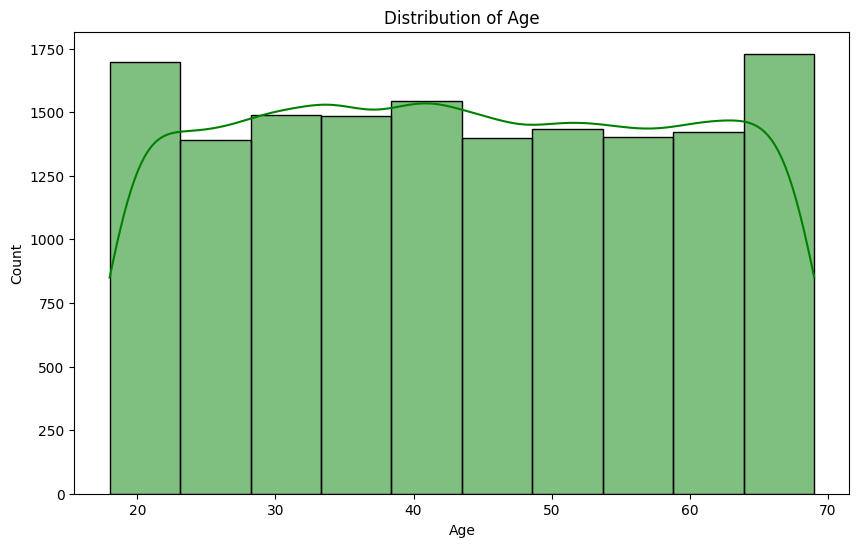

In [14]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], color='green', bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

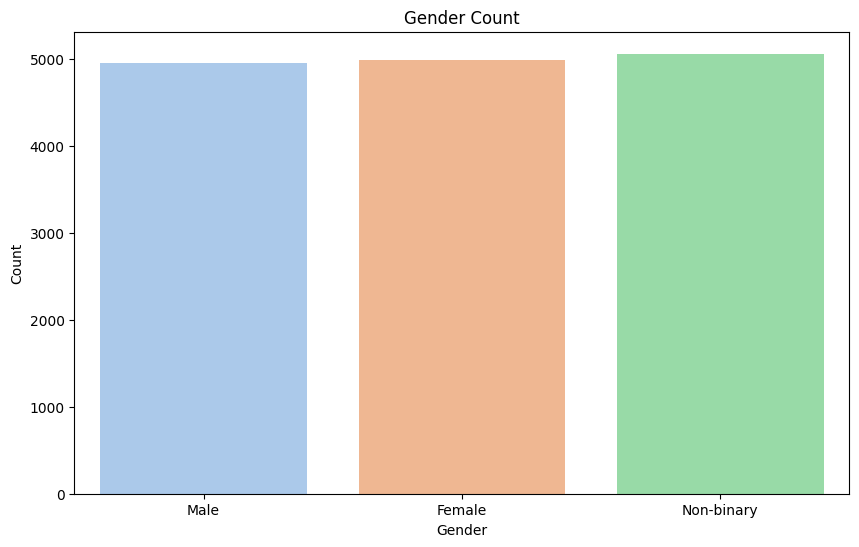

In [15]:
# Gender Count 
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data,palette='pastel', hue='Gender', legend=False)
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

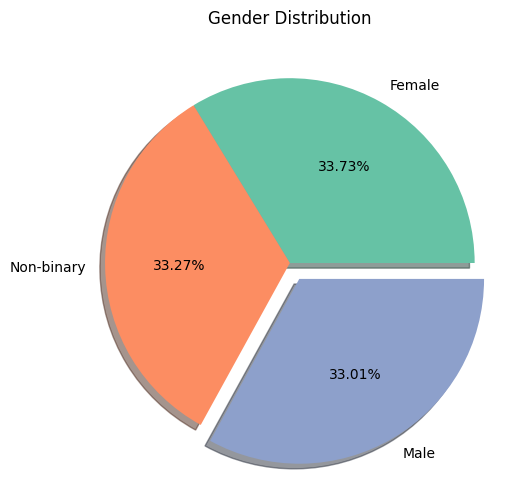

In [16]:
#Gender Distribution
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
plt.figure(figsize=(10,6))
data['Gender'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',
    explode=[0,0,0.1],
    labels=['Female','Non-binary','Male'],
    colors=colors,
    autopct='%1.2f%%',
    shadow=True)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

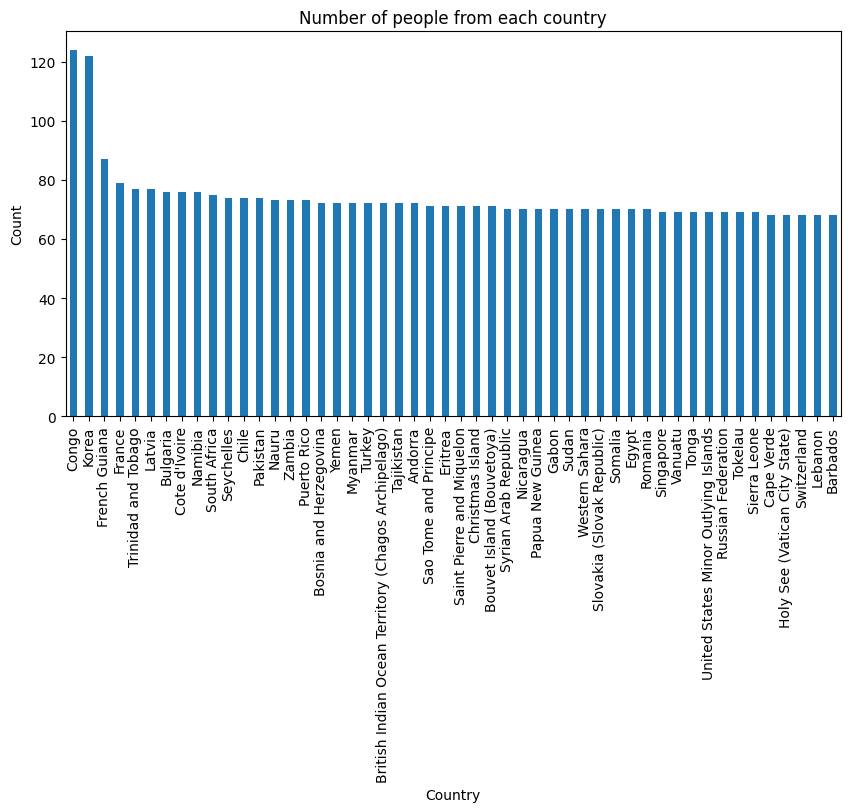

In [17]:
# Number of people from each country 
data['Country'].value_counts().sort_values(ascending=False).head(50)\
.plot(kind='bar',figsize=(10,5))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of people from each country')
plt.show()

<Figure size 1200x800 with 0 Axes>

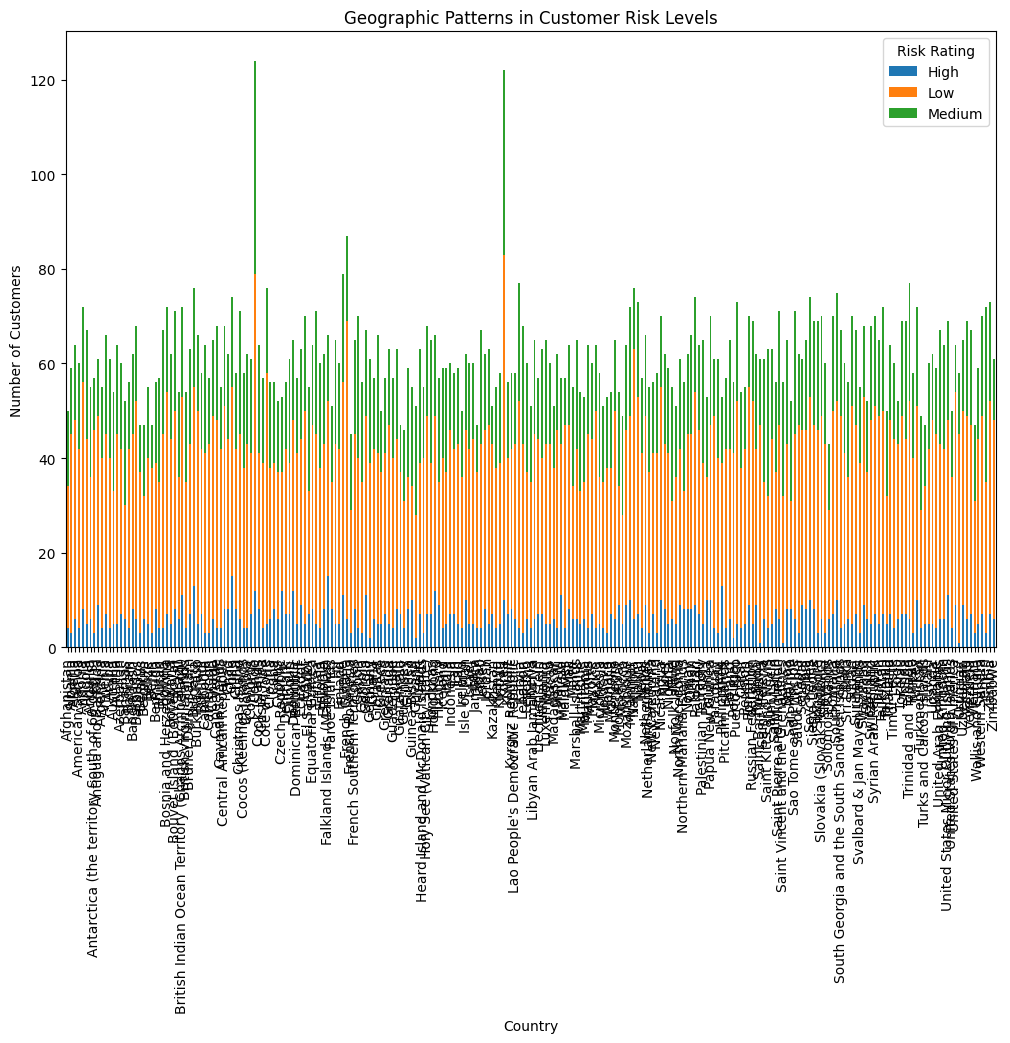

In [18]:
# Analyzing Geographic Patterns in Customer Risk Levels
geographic_risk = data.groupby(['Country', 'Risk Rating']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
geographic_risk.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Geographic Patterns in Customer Risk Levels')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

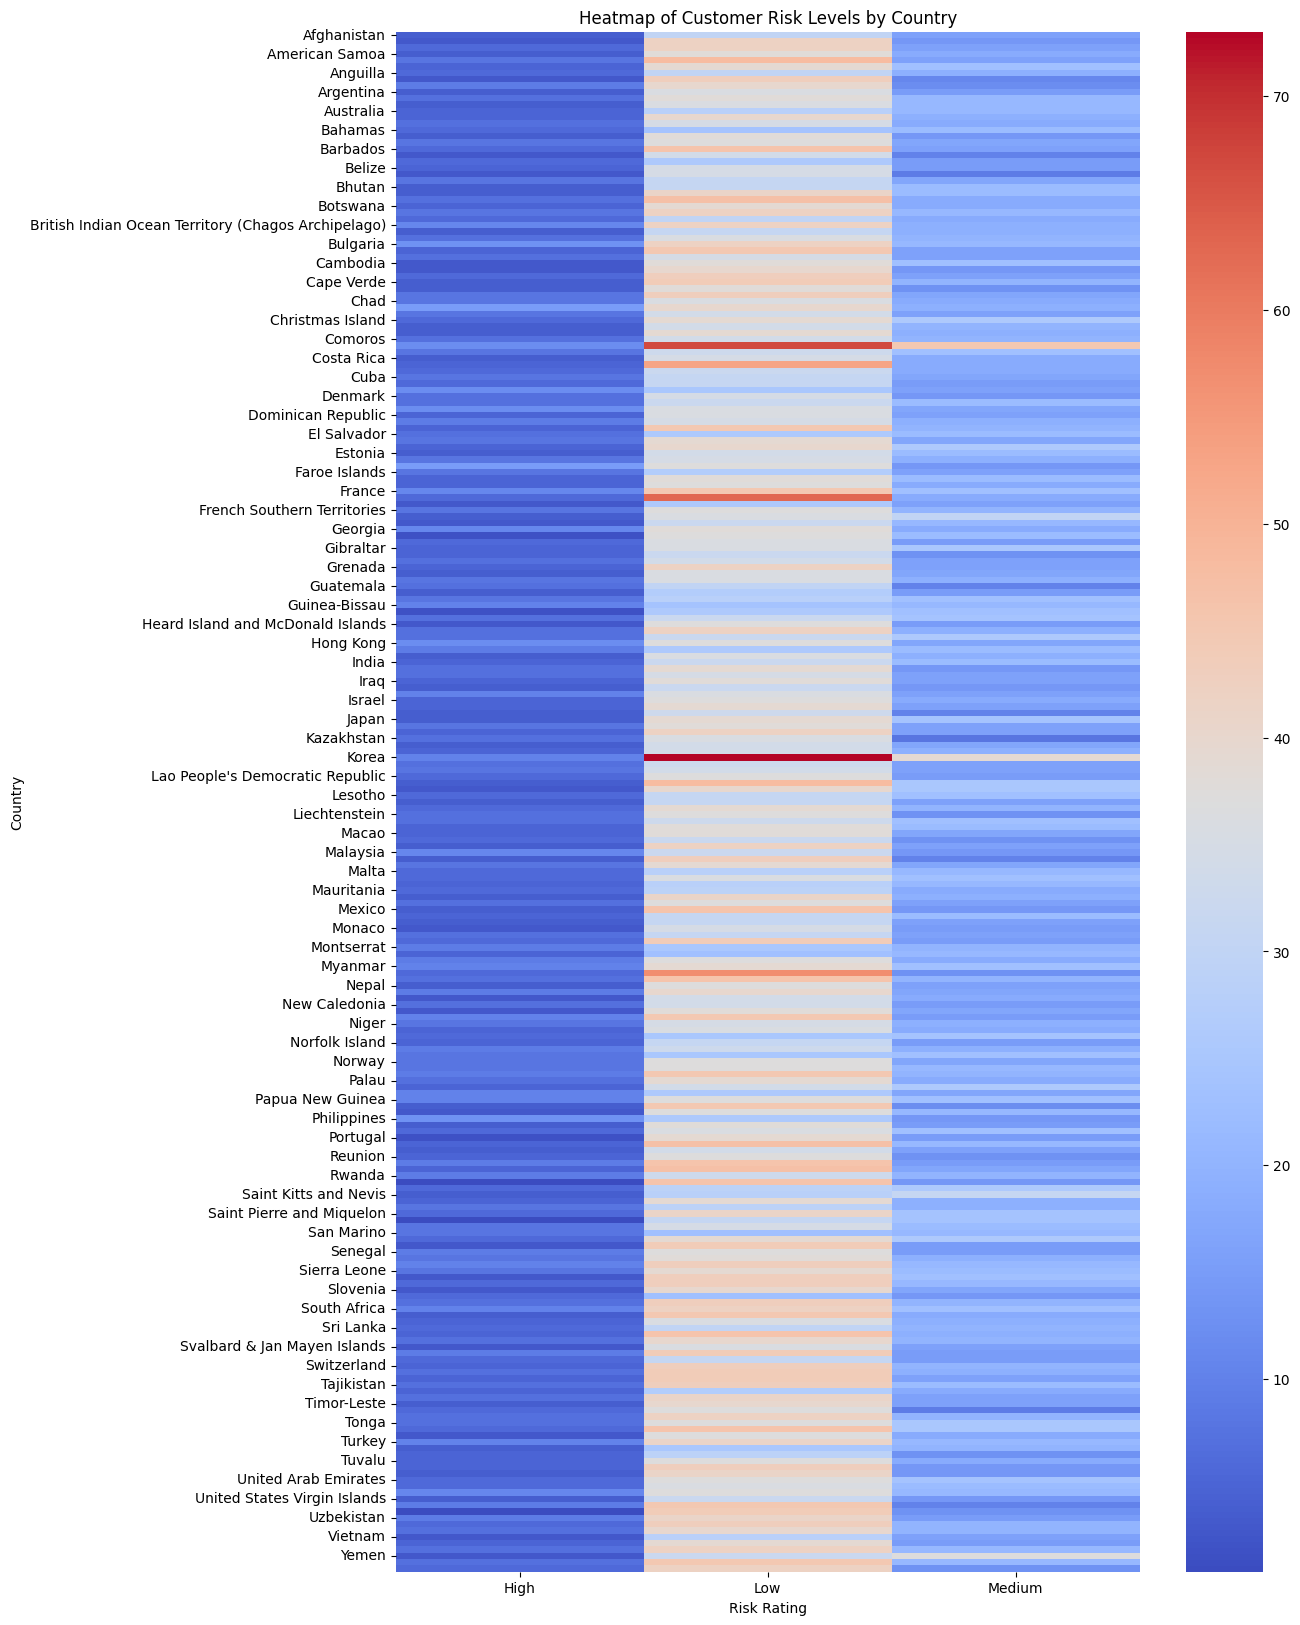

In [19]:
# Pivot the data using heatmap
risk_pivot = data.pivot_table(index='Country', columns='Risk Rating', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 20))
sns.heatmap(risk_pivot, cmap='coolwarm')
plt.title('Heatmap of Customer Risk Levels by Country')
plt.xlabel('Risk Rating')
plt.ylabel('Country')
plt.show()

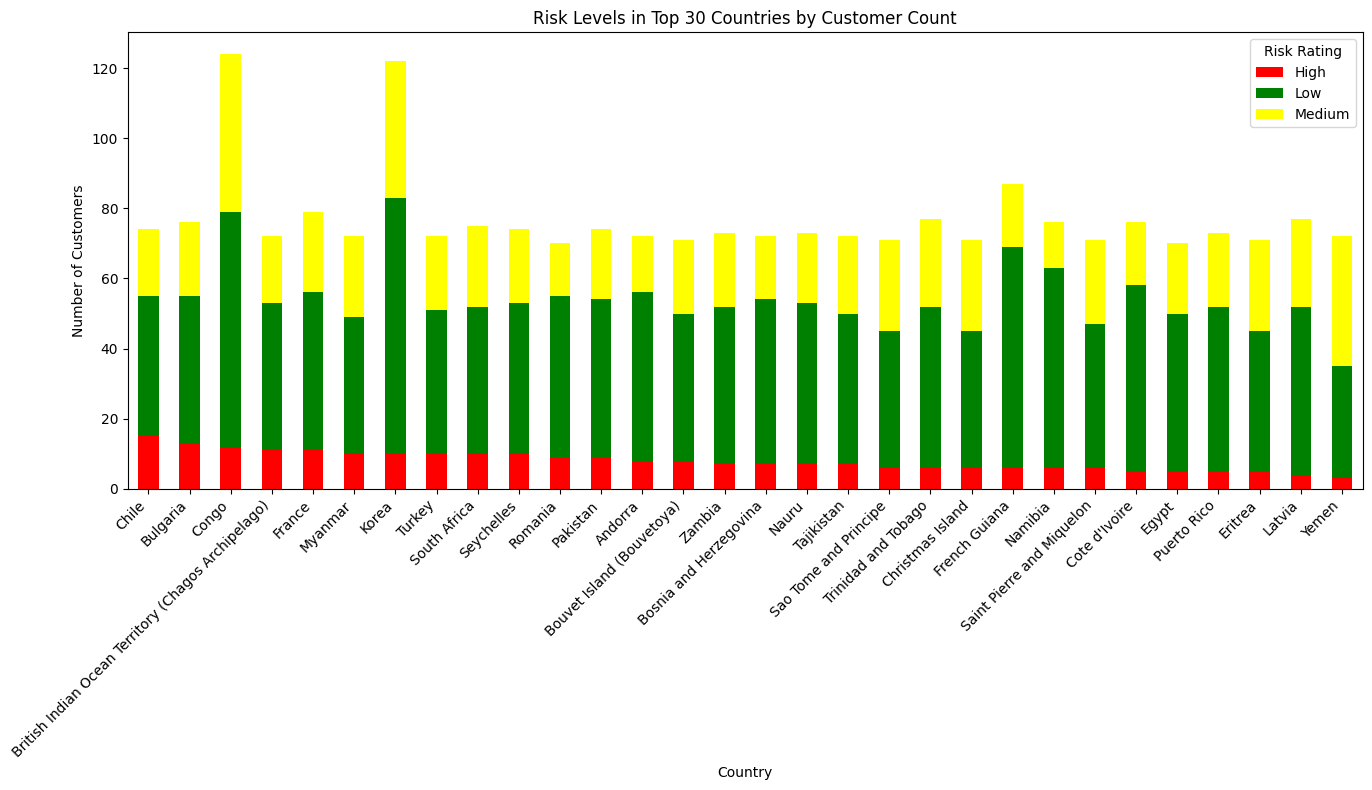

In [20]:
# Top 30 countries by customer count
top_countries = data['Country'].value_counts().nlargest(30).index
top_data = data[data['Country'].isin(top_countries)]

# Group by country and risk rating
country_risk = top_data.groupby(['Country', 'Risk Rating']).size().unstack(fill_value=0)

# Make sure 'High' risk level exists in the columns
if 'High' in country_risk.columns:
    country_risk = country_risk.sort_values('High', ascending=False)
else:
    print("No 'High' risk customers in the dataset.")

# Choose colors for risk ratings
risk_levels = list(country_risk.columns)
color_map = {'High': 'red', 'Medium': 'yellow', 'Low': 'green'}  
colors = [color_map.get(risk, 'grey') for risk in risk_levels]
country_risk.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

plt.title('Risk Levels in Top 30 Countries by Customer Count')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.legend(title='Risk Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

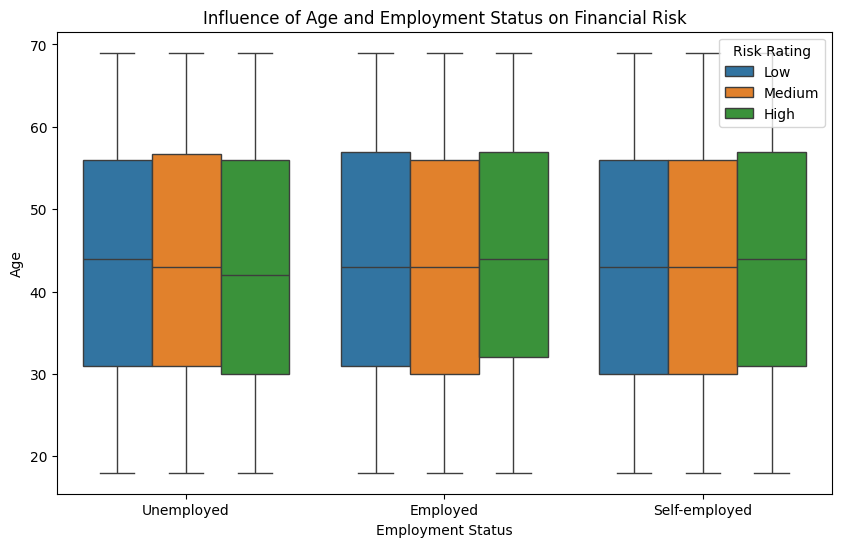

In [21]:
# Do Age and Employment Status affect Financial Risk?
age_employment_risk = data.pivot_table(values='Age', index='Employment Status', columns='Risk Rating', aggfunc='mean')

# Visualize age and employment status influence
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Employment Status', y='Age', hue='Risk Rating')
plt.title('Influence of Age and Employment Status on Financial Risk')
plt.xlabel('Employment Status')
plt.ylabel('Age')
plt.show()

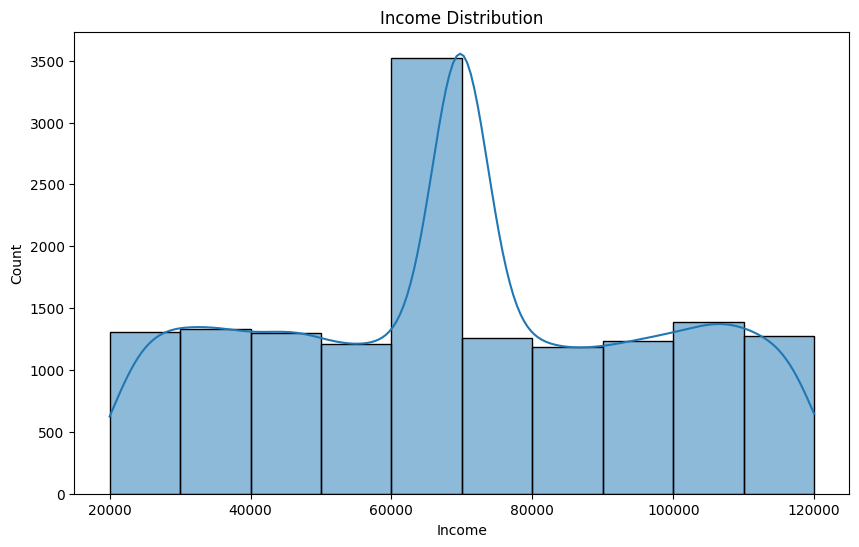

In [22]:
# Income Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['Income'], bins=10, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

- ###  Customer Risk Profilling
    - #### What are the key characteristics of customers in each risk category?
    - #### Which factors most contribute to a customer being categorised as 'High Risk'?

In [23]:
# 3. Key Characteristics of Customers in Each Risk Category
key_characteristics_risk = data.groupby('Risk Rating').agg({
    'Income': ['mean', 'median', 'std'],
    'Credit Score': ['mean', 'median', 'std'],
    'Loan Amount': ['mean', 'median', 'std'],
    'Debt-to-Income Ratio': ['mean', 'median', 'std'],
    'Previous Defaults': ['mean', 'median', 'std'],
    'Assets Value': ['mean', 'median', 'std']
})

key_characteristics_risk = key_characteristics_risk.round(2)
print("Key Characteristics of Customers in Each Risk Category:\n", key_characteristics_risk)


Key Characteristics of Customers in Each Risk Category:
                Income                    Credit Score                \
                 mean   median       std         mean median    std   
Risk Rating                                                           
High         69130.46  69773.0  26347.98       699.74  699.0  53.02   
Low          69644.95  69773.0  26902.86       698.97  699.0  52.88   
Medium       70697.75  69773.0  27022.23       699.12  699.0  52.45   

            Loan Amount                    Debt-to-Income Ratio               \
                   mean   median       std                 mean median   std   
Risk Rating                                                                    
High           27920.20  27544.0  11952.09                 0.35   0.35  0.14   
Low            27388.02  27544.0  11946.80                 0.35   0.35  0.14   
Medium         27464.26  27544.0  11919.05                 0.35   0.35  0.15   

            Previous Defaults      

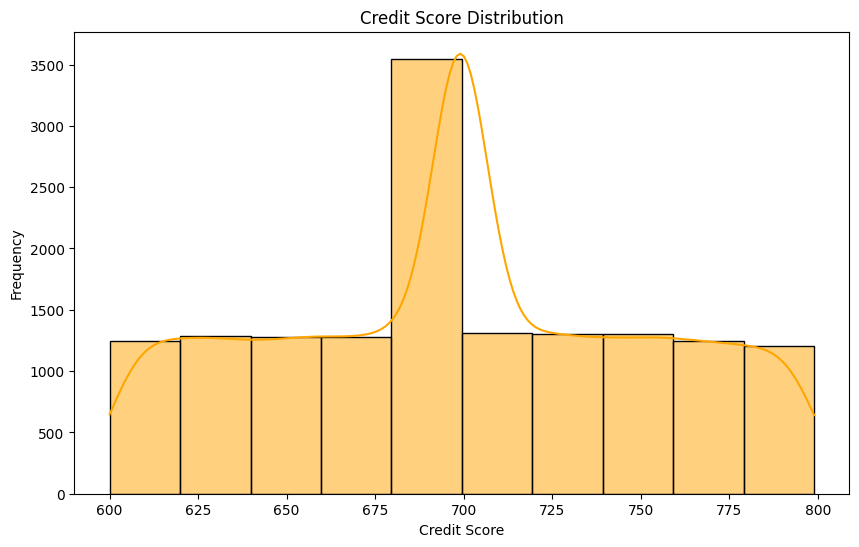

In [24]:
# Credit Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Credit Score'], color='orange', bins=10, kde=True)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Find the average credit score in each category
aver_credit_score=pd.DataFrame(data.groupby('Gender')['Credit Score'].mean().sort_values(ascending=False))
aver_credit_score.style.background_gradient(cmap='winter_r')

In [26]:
# Employment Status in Genders
employe=pd.DataFrame(data.groupby('Gender')['Employment Status'].value_counts())
employe.unstack().style.background_gradient(cmap='Reds')

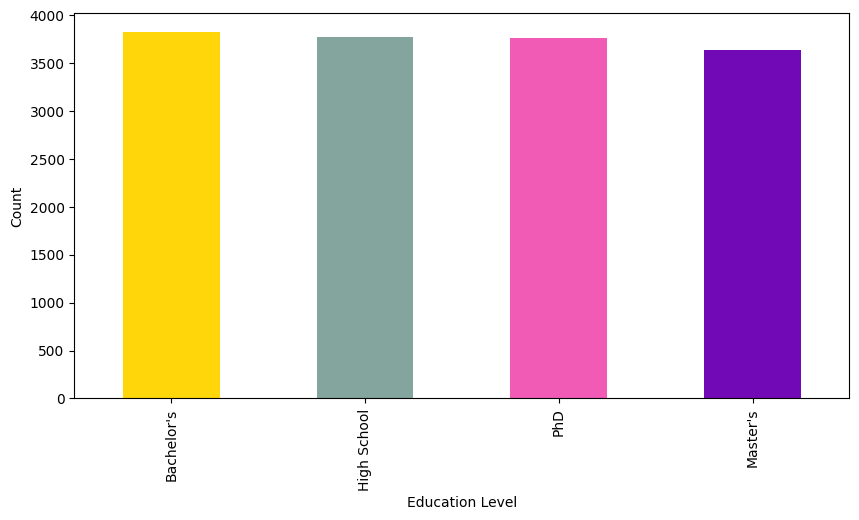

In [27]:
# Education level Distribution
data['Education Level'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),color=['#ffd60a','#84a59d','#f15bb5','#7209b7'])
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

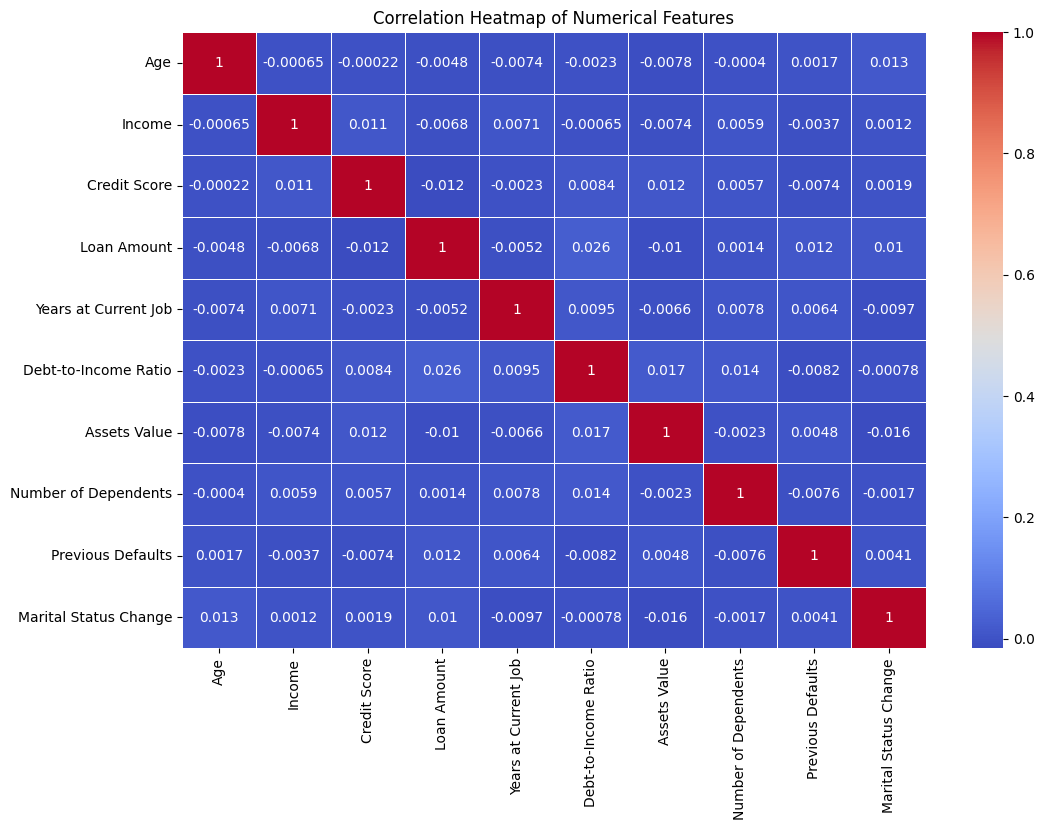

In [28]:
# Correlation for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

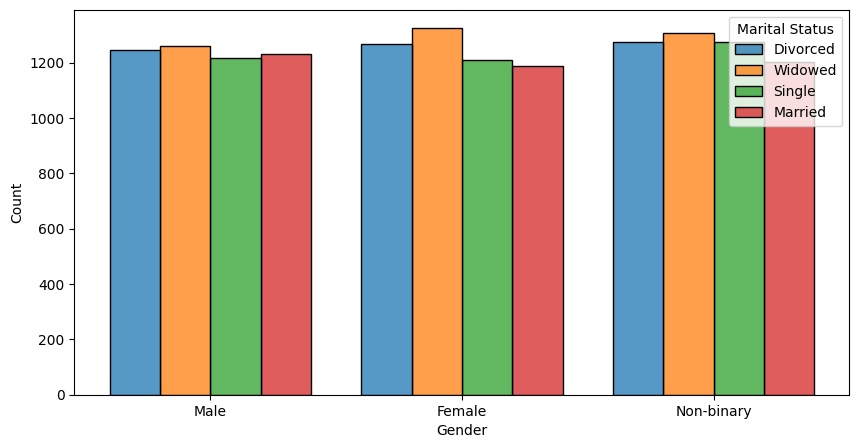

In [29]:
# Different Marital Status in each Gender
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='Gender',hue='Marital Status',multiple="dodge", shrink=.8)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

- ###  Income and Credit behavior Analysis
    - #### What is the relationship between income levels and credit risk?
    - #### Do higher debt-to-income ratios increase the likelihood of default or a high-risk rating?

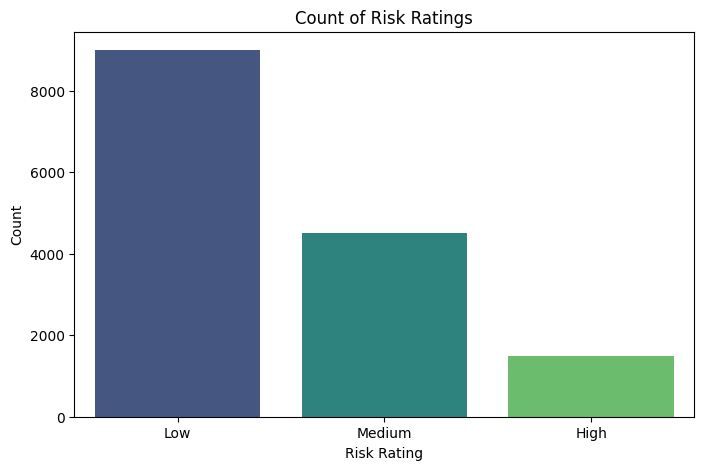

In [30]:
# Risk Rating Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Risk Rating', data=data, palette='viridis')
plt.title('Count of Risk Ratings')
plt.xlabel('Risk Rating')
plt.ylabel('Count')
plt.show()

<Figure size 1000x500 with 0 Axes>

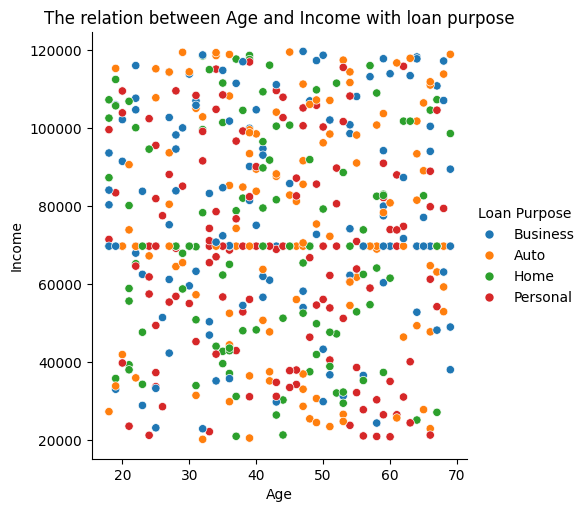

In [31]:
# Relationship between Age and Income with Loan Purpose 
plt.figure(figsize=(10,5))
sns.relplot(x ="Age", y ="Income", data = data[:500],hue='Loan Purpose')
plt.title('The relation between Age and Income with loan purpose')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

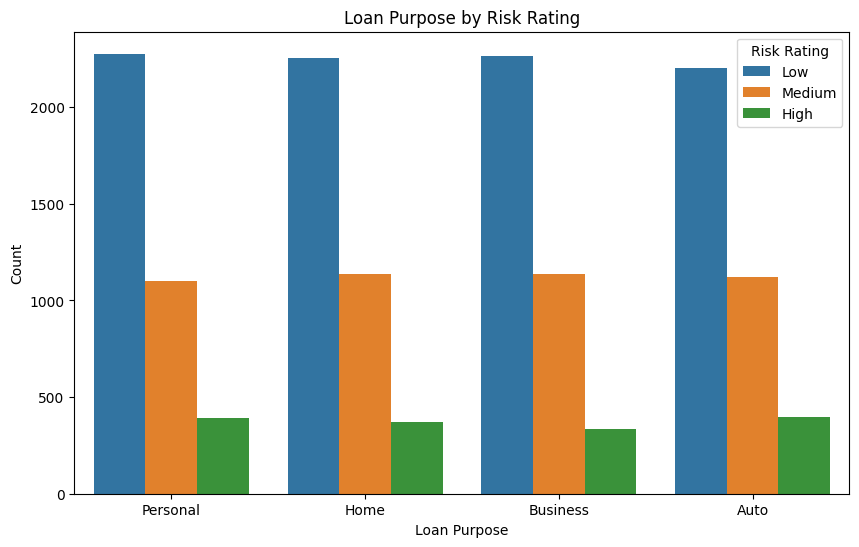

In [32]:
#  Loan Purpose by Risk Rating

plt.figure(figsize=(10, 6))
sns.countplot(x='Loan Purpose', hue='Risk Rating', data=data, order=data['Loan Purpose'].value_counts().index)
plt.title('Loan Purpose by Risk Rating')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.legend(title='Risk Rating')
plt.show()

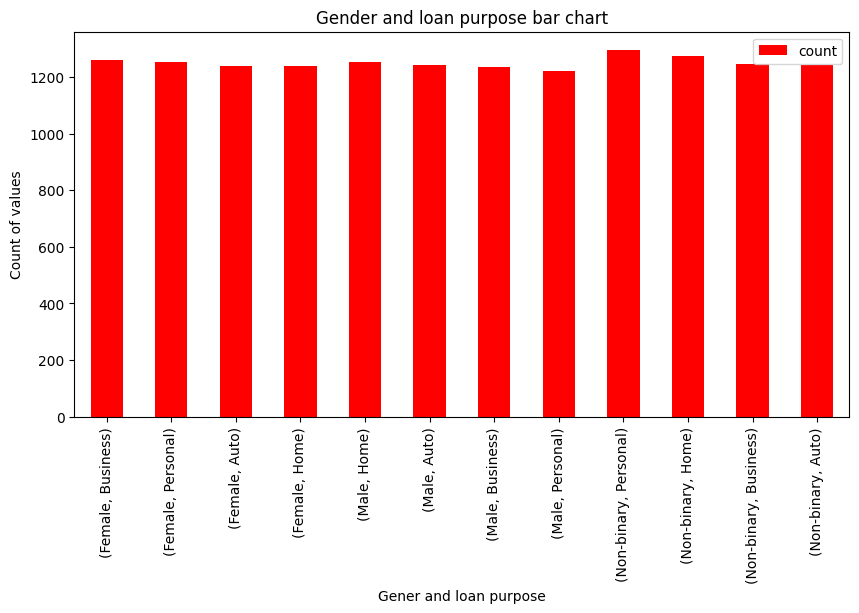

In [33]:
gender_loan=pd.DataFrame(data.groupby('Gender')['Loan Purpose'].value_counts())
gender_loan.plot(kind='bar',figsize=(10,5),color=['red'])
plt.title('Gender and loan purpose bar chart')
plt.xlabel('Gener and loan purpose')
plt.ylabel('Count of values')
plt.show()

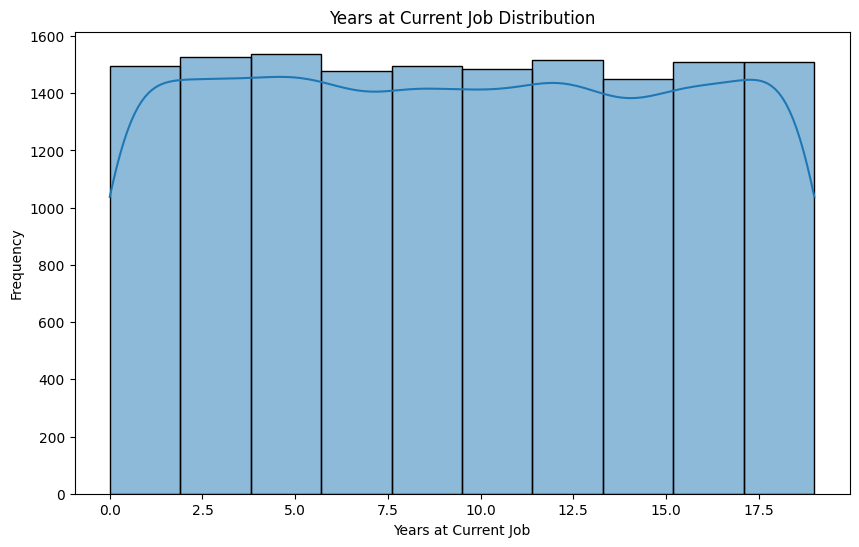

In [34]:
# Years at Current Job Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Years at Current Job'], bins=10, kde=True)
plt.title('Years at Current Job Distribution')
plt.xlabel('Years at Current Job')
plt.ylabel('Frequency')
plt.show()

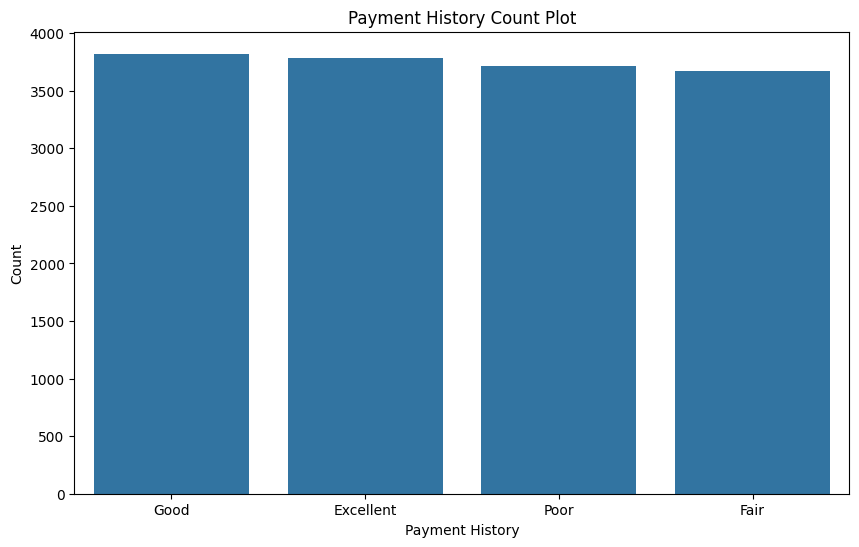

In [35]:
# Payment History Count
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment History', data=data, order=data['Payment History'].value_counts().index)
plt.title('Payment History Count Plot')
plt.xlabel('Payment History')
plt.ylabel('Count')
plt.show()

In [36]:
#Years of Experience at Current Job Across Different Education Levels

Education_exp=pd.DataFrame(data.groupby('Education Level')['Years at Current Job'].value_counts().sort_values(ascending=False))
Education_exp.unstack().style.background_gradient(cmap='copper_r')

<Figure size 1000x500 with 0 Axes>

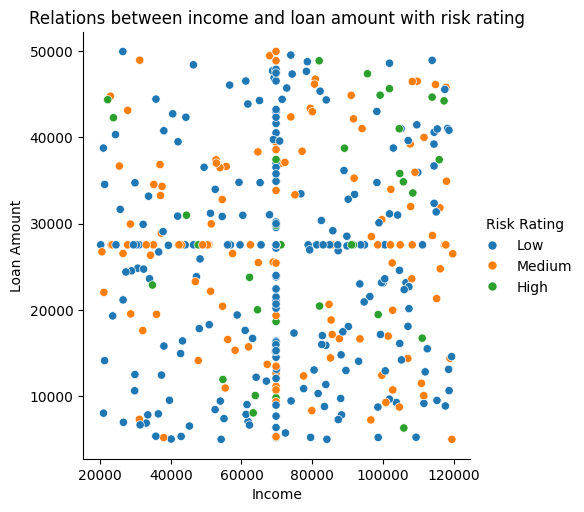

In [37]:
# Relationship between Income and Loan Amount by Risk Rating
plt.figure(figsize=(10,5))
sns.relplot(data=data[:400],x='Income',y='Loan Amount',hue='Risk Rating')
plt.title('Relations between income and loan amount with risk rating')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

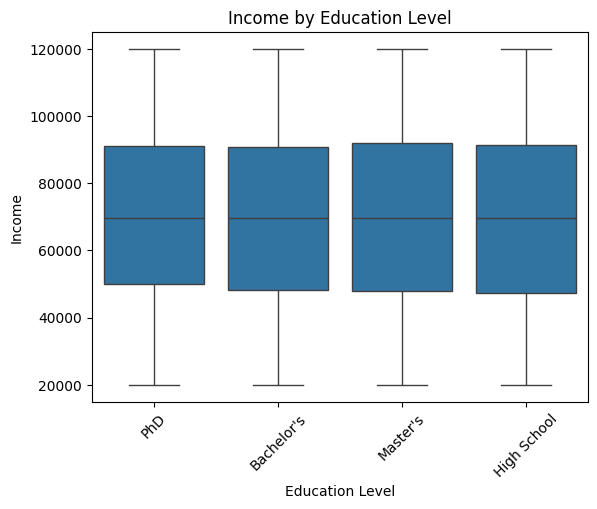

In [38]:
# Compair income variations among different educational groups

sns.boxplot(data=data, x='Education Level', y='Income')
plt.title('Income by Education Level')
plt.xticks(rotation=45)
plt.show()

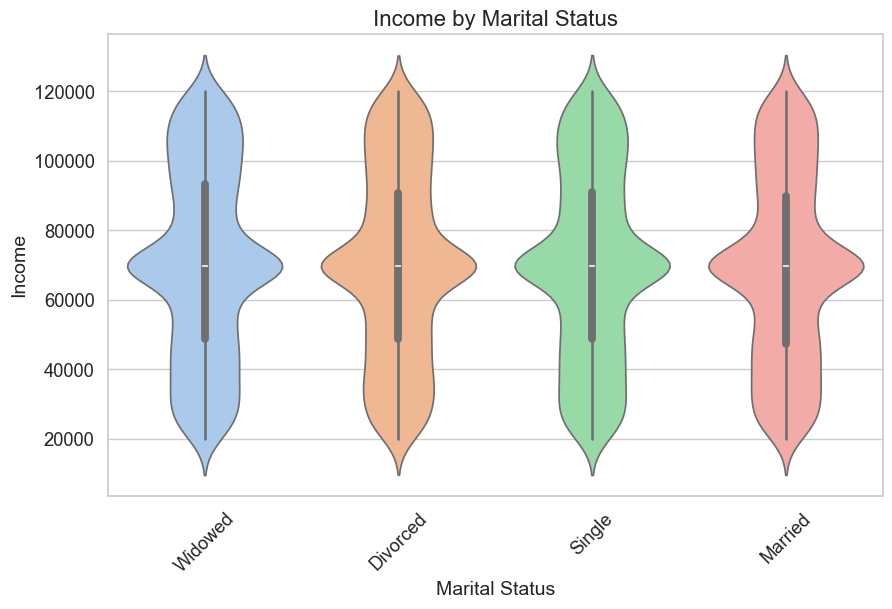

In [39]:
# Income distributions across marital statuses

sns.set_theme(style='whitegrid')
sns.set_context('notebook', font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.violinplot(x='Marital Status', y='Income', data=data, order=data['Marital Status'].value_counts().index, palette='pastel')

plt.title('Income by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(rotation=45)

plt.show()


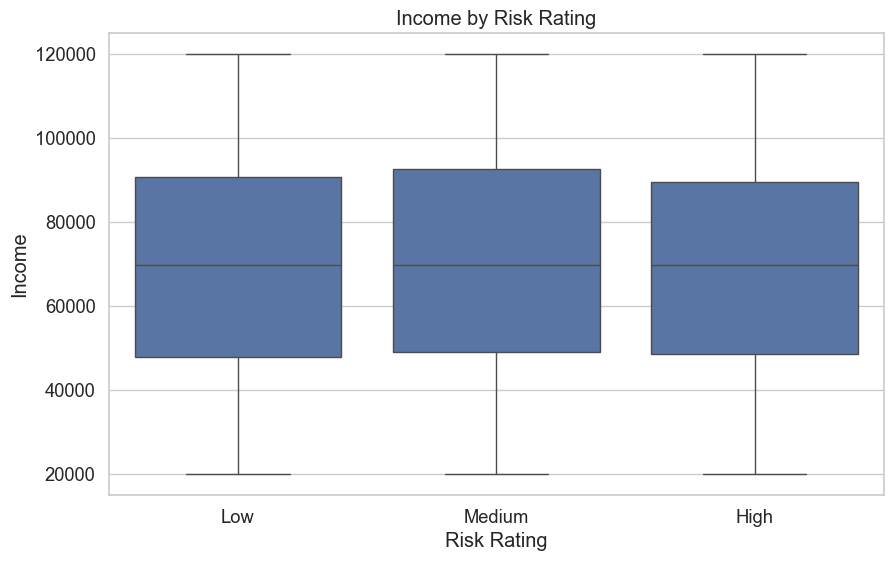

In [40]:
# Relationship Between Income Levels and Credit Risk
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk Rating', y='Income', data=data)
plt.title('Income by Risk Rating')
plt.xlabel('Risk Rating')
plt.ylabel('Income')
plt.show()

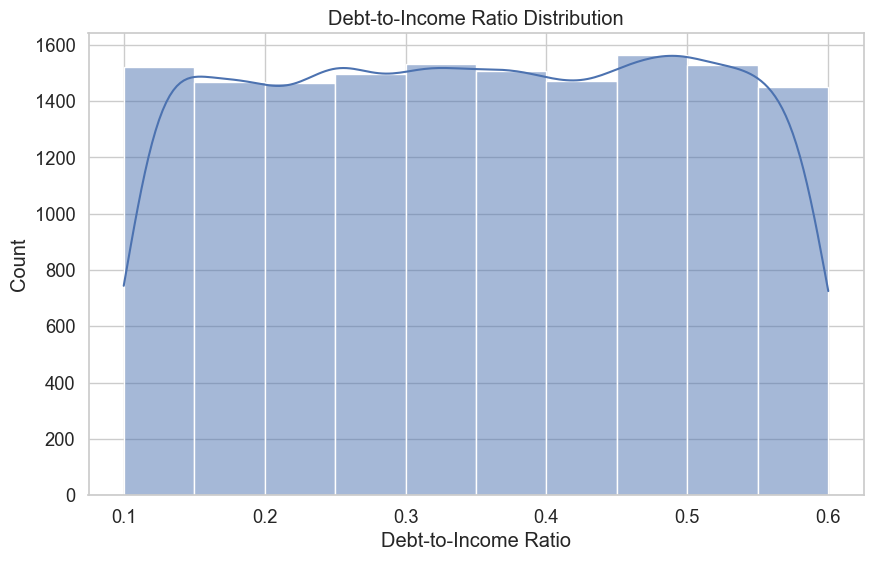

In [41]:
# Debt-to-Income Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Debt-to-Income Ratio'], bins=10, kde=True)
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Count')
plt.show()


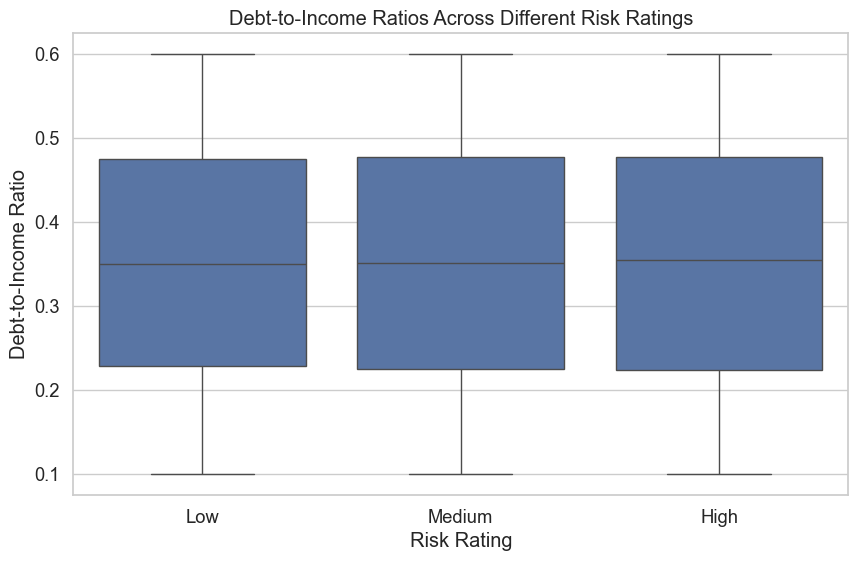

In [42]:
# Do higher debt-to-income ratios increase the likelihood of default or a high-risk rating?

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Risk Rating', y='Debt-to-Income Ratio')
plt.title('Debt-to-Income Ratios Across Different Risk Ratings')
plt.xlabel('Risk Rating')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

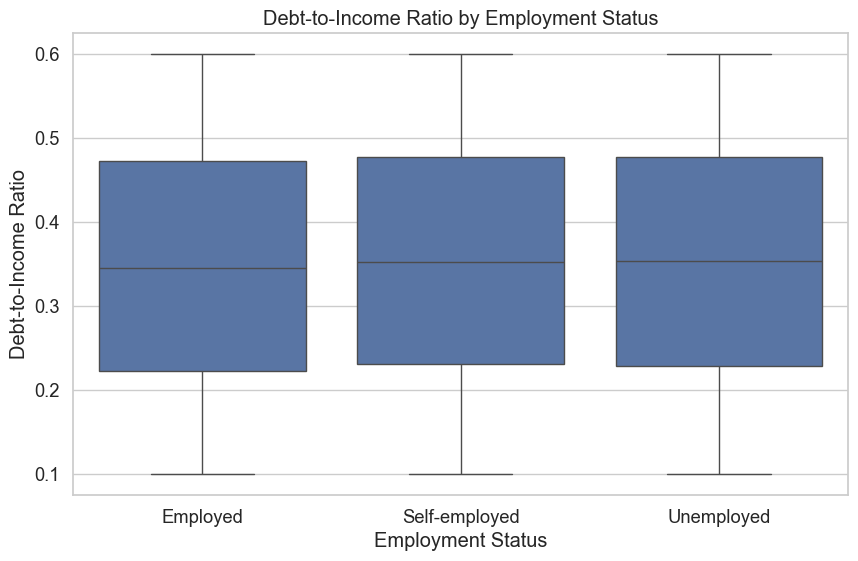

In [43]:
# Boxplot for Debt-to-Income Ratio by Employment Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment Status', y='Debt-to-Income Ratio', data=data, order=data['Employment Status'].value_counts().index)
plt.title('Debt-to-Income Ratio by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

- ###  Customer Retention and Acquisition
    - #### What traits are common among customers who maintain a 'Low Risk' rating over time?
    - #### How can we attract more low-risk customers?

In [44]:
# Common Traits Among Customers Who Maintain a 'Low Risk' Rating Over Time
low_risk_customers = data[data['Risk Rating'] == 'Low']
traits_low_risk = low_risk_customers.agg({
    'Age': ['mean', 'median', 'std'],
    'Income': ['mean', 'median', 'std'],
    'Credit Score': ['mean', 'median', 'std'],
    'Loan Amount': ['mean', 'median', 'std'],
    'Debt-to-Income Ratio': ['mean', 'median', 'std'],
    'Years at Current Job': ['mean', 'median', 'std'],
    'Assets Value': ['mean', 'median', 'std'],
    'Previous Defaults': ['mean', 'median', 'std'],
    'Number of Dependents': ['mean', 'median', 'std']
})

print("Common Traits of Low-Risk Customers:\n", traits_low_risk)


Common Traits of Low-Risk Customers:
               Age        Income  Credit Score   Loan Amount  \
mean    43.550444  69644.948667    698.969778  27388.017778   
median  43.000000  69773.000000    699.000000  27544.000000   
std     14.909264  26902.859104     52.880641  11946.800367   

        Debt-to-Income Ratio  Years at Current Job   Assets Value  \
mean                0.350018              9.419222  159580.516111   
median              0.349737              9.000000  159362.000000   
std                 0.143454              5.751911   74212.511149   

        Previous Defaults  Number of Dependents  
mean             1.989778              2.017444  
median           2.000000              2.000000  
std              1.318197              1.301365  


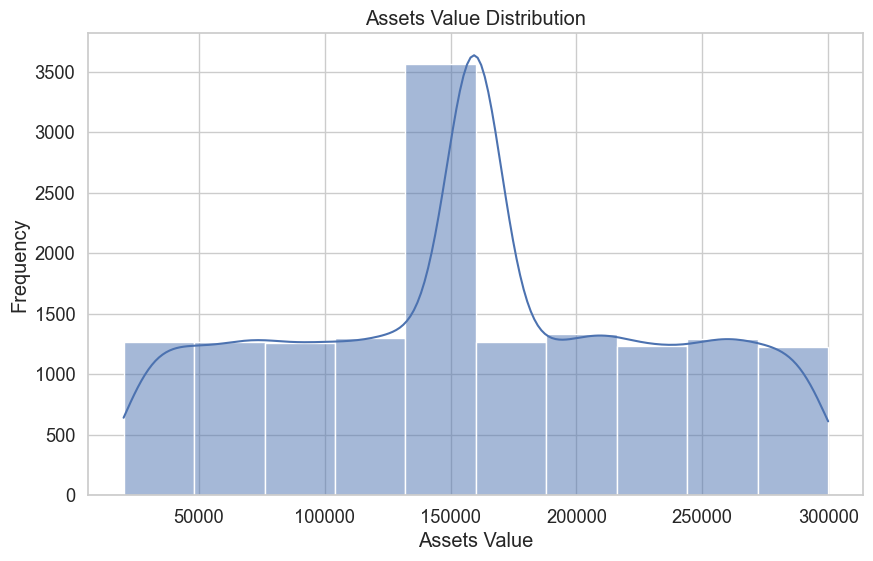

In [45]:
# Assets Value Distribution 

plt.figure(figsize=(10, 6))
sns.histplot(data['Assets Value'], bins=10, kde=True)
plt.title('Assets Value Distribution')
plt.xlabel('Assets Value')
plt.ylabel('Frequency')
plt.show()

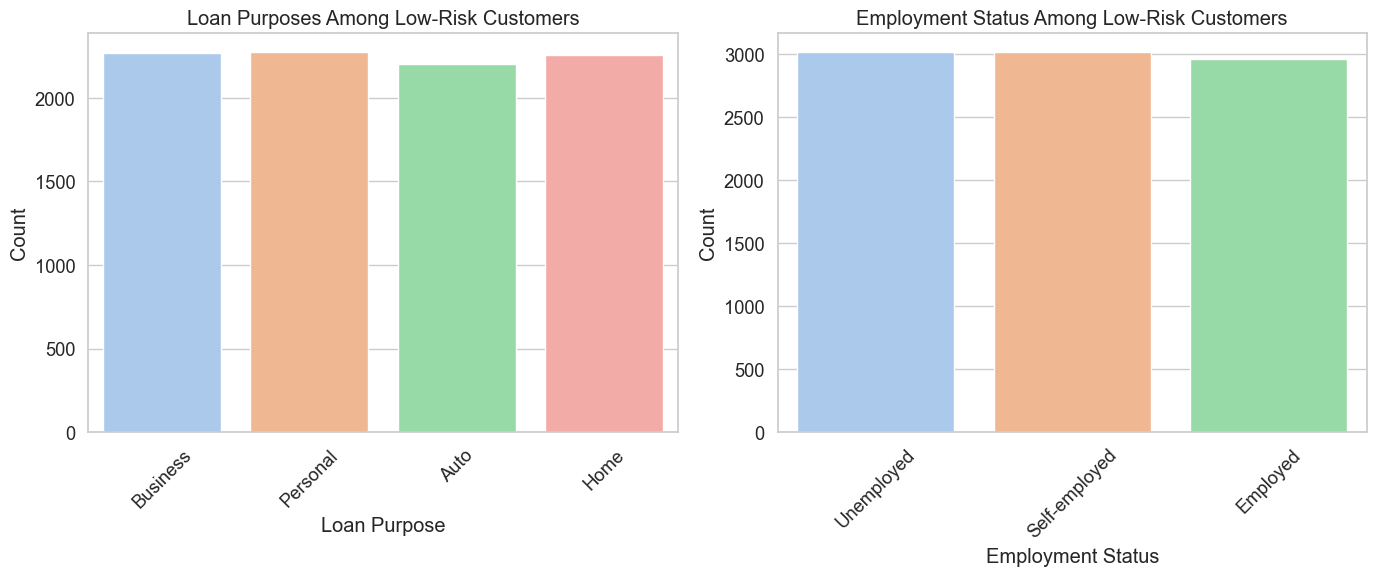

In [46]:
# Strategies to Attract More Low-Risk Customers
# Analyzing loan purposes and employment status of low-risk customers

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=low_risk_customers, x='Loan Purpose', ax=axes[0], palette='pastel')
axes[0].set_title('Loan Purposes Among Low-Risk Customers')
axes[0].set_xlabel('Loan Purpose')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45) 

sns.countplot(data=low_risk_customers, x='Employment Status', ax=axes[1], palette='pastel')
axes[1].set_title('Employment Status Among Low-Risk Customers')
axes[1].set_xlabel('Employment Status')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

- ###  Impact of Credit Score and Payment History
    - #### Which types of loans are linked to higher risk ratings?
    - #### How does the loan amount affect risk rating?

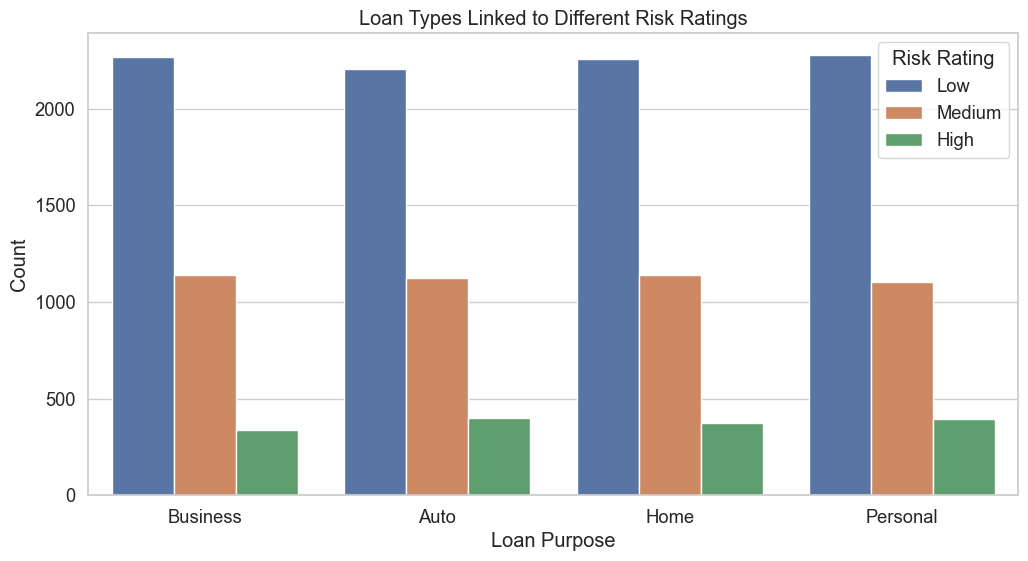

In [47]:
# Types of Loans Linked to Higher Risk Ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Loan Purpose', hue='Risk Rating')
plt.title('Loan Types Linked to Different Risk Ratings')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.show()

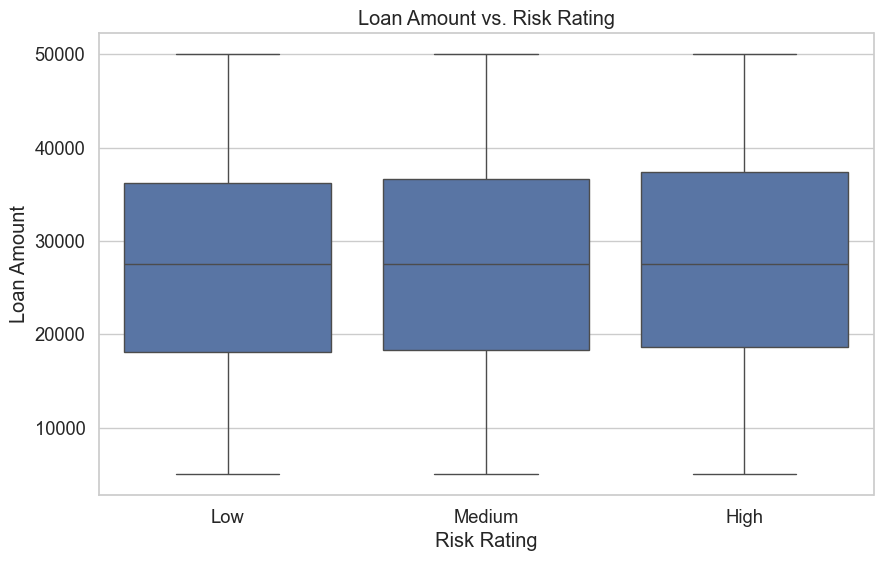

In [48]:
# Loan Amount and Risk Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Risk Rating', y='Loan Amount')
plt.title('Loan Amount vs. Risk Rating')
plt.xlabel('Risk Rating')
plt.ylabel('Loan Amount')
plt.show()

- ###  Loan Management and Strategy
    - #### What is the impact of different credit score ranges on loan approval rates and risk ratings?
    - #### How does the payment history affect the risk rating?

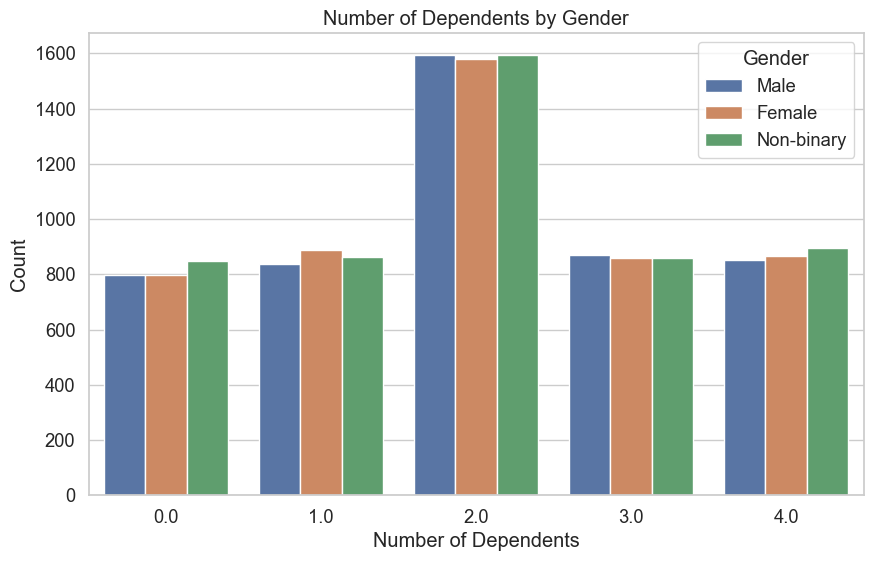

In [49]:
# Relationship between Assets Value and Risk Rating
# Number of Dependents by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Number of Dependents', hue='Gender', data=data)
plt.title('Number of Dependents by Gender')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

<Figure size 1000x600 with 0 Axes>

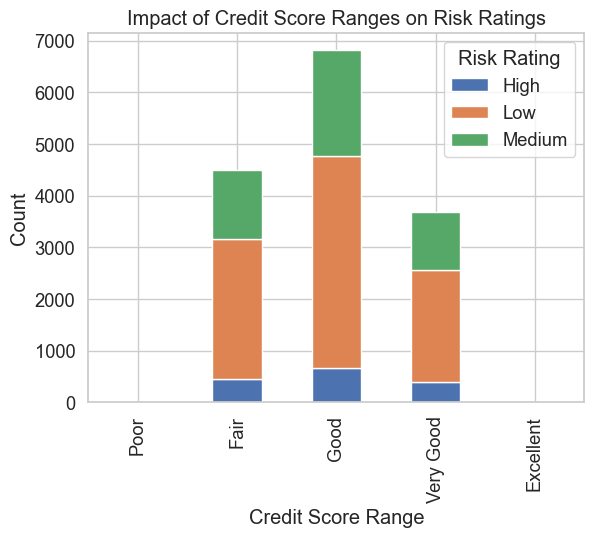

In [50]:
# Impact of Different Credit Score Ranges on Loan Approval Rates and Risk Ratings
bins = [300, 580, 670, 740, 800, 850]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
data['Credit Score Range'] = pd.cut(data['Credit Score'], bins=bins, labels=labels, include_lowest=True)
credit_score_impact = data.groupby(['Credit Score Range', 'Risk Rating']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
credit_score_impact.plot(kind='bar', stacked=True)
plt.title('Impact of Credit Score Ranges on Risk Ratings')
plt.xlabel('Credit Score Range')
plt.ylabel('Count')
plt.show()

In [51]:
# Average Credit Score and Loan Amount for each Education Level

averge_loan_credit_score=pd.DataFrame(data.groupby('Education Level')[['Credit Score','Loan Amount']].mean())
averge_loan_credit_score.style.background_gradient(cmap='Blues')

In [52]:
# The Distribution of Gender across different combinations of Employment Status and Risk Rating

employe_risk=pd.DataFrame(data.groupby(['Employment Status','Risk Rating'])['Gender'].value_counts())
employe_risk.unstack().style.background_gradient(cmap='Reds_r')

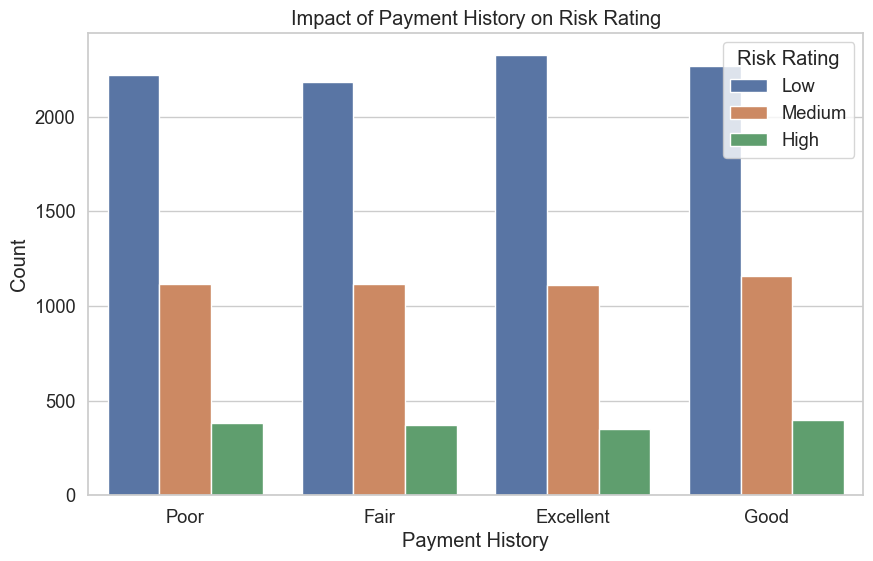

In [53]:
# Effect of Payment History on Risk Rating
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Payment History', hue='Risk Rating')
plt.title('Impact of Payment History on Risk Rating')
plt.xlabel('Payment History')
plt.ylabel('Count')
plt.show()

- ###  Default Prevention and Risk Mitigation
    - #### What are the early warning signs of potential defaults?
    - #### How can we manage high-risk customers to reduce the chance of defaults?

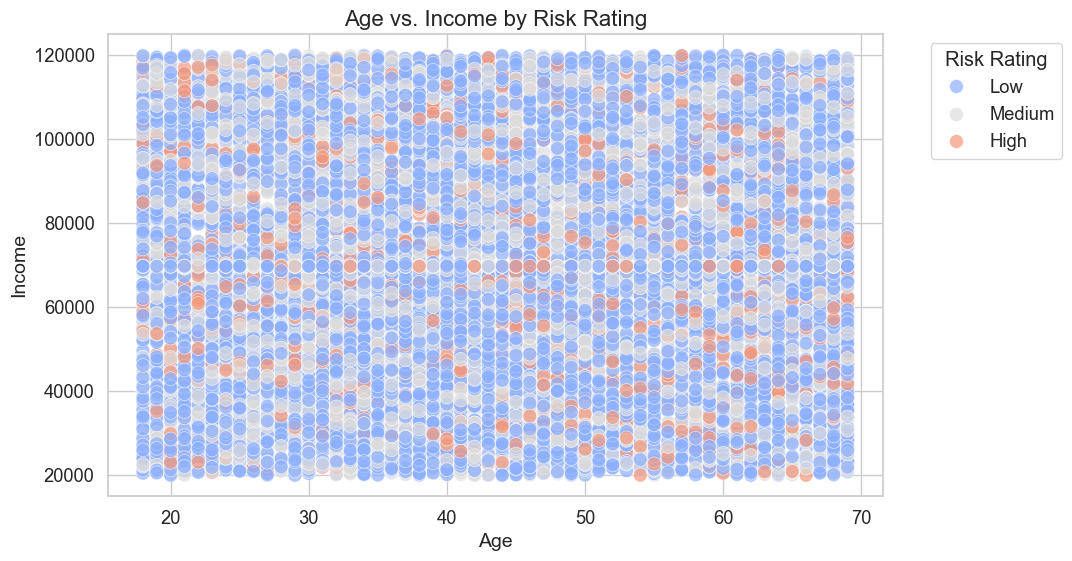

In [54]:
# How Age and Income relate to Risk Rating

# Set style for a cleaner look
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', hue='Risk Rating', data=data, palette='coolwarm', s=100, alpha=0.7, edgecolor='w', linewidth=0.5)
plt.title('Age vs. Income by Risk Rating', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.legend(title='Risk Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [55]:
# Early Warning Signs of Potential Defaults
# Only numeric columns 
numeric_columns = data.select_dtypes(include=[float, int])

correlation_defaults = numeric_columns.corr()['Previous Defaults'].sort_values(ascending=False)

correlation_df = pd.DataFrame(correlation_defaults).reset_index()
correlation_df.columns = ['Feature', 'Correlation with Previous Defaults']

styled_correlation = correlation_df.style.background_gradient(cmap='Reds_r')

styled_correlation


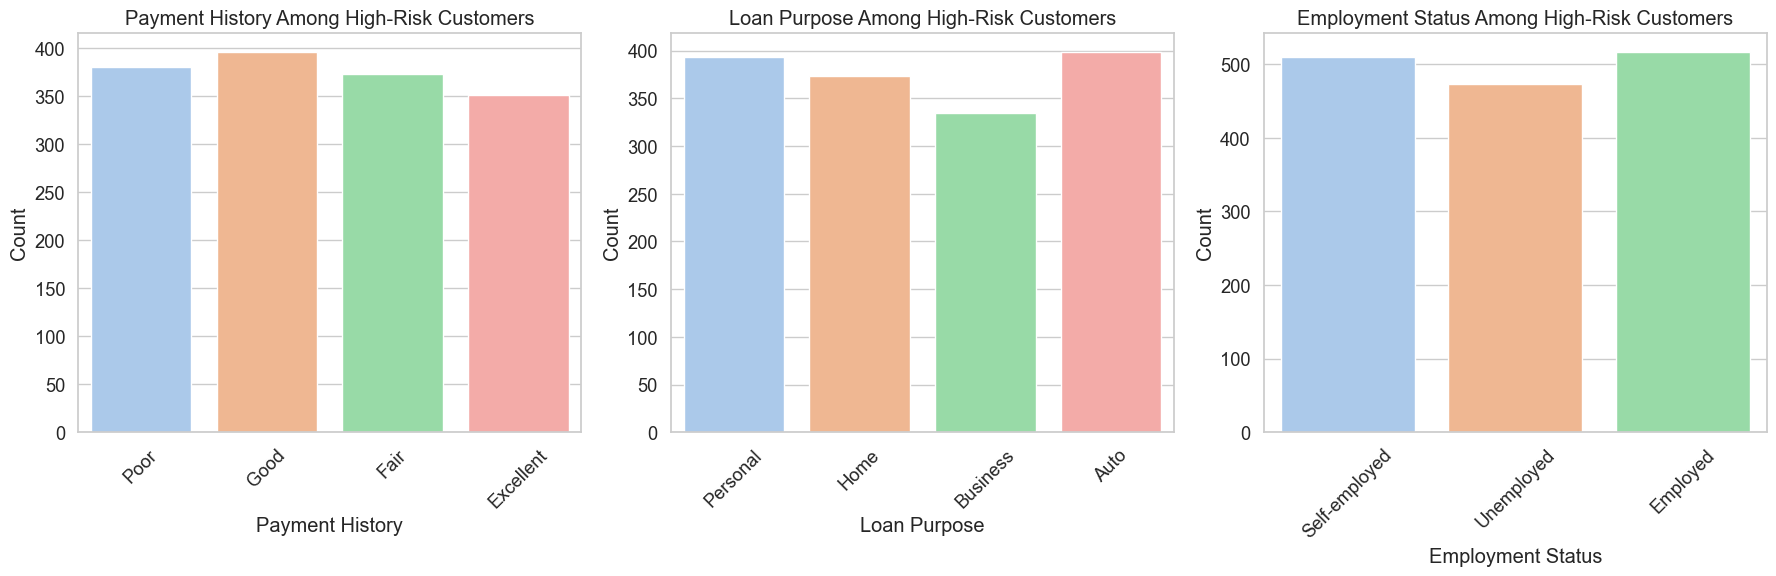

In [56]:
# Managing High-Risk Customers to Reduce Defaults
# Filter only high-risk customers
high_risk_customers = data[data['Risk Rating'] == 'High']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=high_risk_customers, x='Payment History', ax=axes[0], palette='pastel')
axes[0].set_title('Payment History Among High-Risk Customers')
axes[0].set_xlabel('Payment History')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45) 

sns.countplot(data=high_risk_customers, x='Loan Purpose', ax=axes[1], palette='pastel')
axes[1].set_title('Loan Purpose Among High-Risk Customers')
axes[1].set_xlabel('Loan Purpose')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45) 

sns.countplot(data=high_risk_customers, x='Employment Status', ax=axes[2], palette='pastel')
axes[2].set_title('Employment Status Among High-Risk Customers')
axes[2].set_xlabel('Employment Status')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

- ###  Financial Health and Product Development
    - #### What additional financial products could help mitigate risk or better serve different customer segments?
    - #### How does our portfolio's risk distribution compare to industry benchmarks?

In [57]:
# Additional Financial Products to Mitigate Risk

financial_products_analysis = data.groupby('Risk Rating').agg({
    'Loan Purpose': pd.Series.mode,
    'Employment Status': pd.Series.mode,
    'Payment History': pd.Series.mode})

print("Potential Financial Product Opportunities:\n", financial_products_analysis)

Potential Financial Product Opportunities:
                  Loan Purpose Employment Status Payment History
Risk Rating                                                    
High                     Auto          Employed            Good
Low                  Personal     Self-employed       Excellent
Medium       [Business, Home]          Employed            Good


<Figure size 1000x600 with 0 Axes>

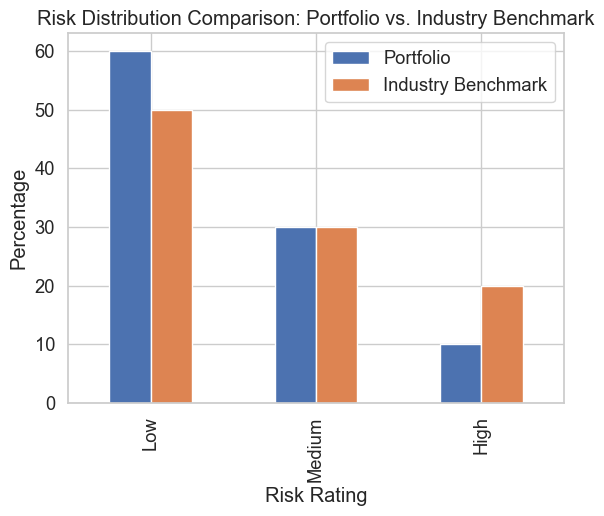

In [58]:
# Portfolio Risk Distribution vs. Industry Benchmarks
industry_benchmark = {'Low': 50, 'Medium': 30, 'High': 20}
portfolio_distribution = data['Risk Rating'].value_counts(normalize=True) * 100
comparison_df = pd.DataFrame({'Portfolio': portfolio_distribution, 'Industry Benchmark': industry_benchmark})

plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar')
plt.title('Risk Distribution Comparison: Portfolio vs. Industry Benchmark')
plt.xlabel('Risk Rating')
plt.ylabel('Percentage')
plt.show()

- ###  Strategic Business Insights
    - #### What are the financial impacts of different risk levels on our bottom line?

In [59]:
# Financial Impacts of Different Risk Levels

financial_impact_analysis = data.groupby('Risk Rating').agg({
    'Loan Amount': ['mean', 'sum'],
    'Income': ['mean', 'sum'],
    'Previous Defaults': 'mean'})

print("Financial Impact of Different Risk Levels:\n", financial_impact_analysis)

Financial Impact of Different Risk Levels:
               Loan Amount                     Income               \
                     mean          sum          mean          sum   
Risk Rating                                                         
High         27920.201333   41880302.0  69130.456000  103695684.0   
Low          27388.017778  246492160.0  69644.948667  626804538.0   
Medium       27464.261556  123589177.0  70697.746444  318139859.0   

            Previous Defaults  
                         mean  
Risk Rating                    
High                 1.981333  
Low                  1.989778  
Medium               2.005333  


## Modeling and Predictions
- #### Predicting the Risk Rating
    - ##### Logistic Regression Model
    - ##### Random Forest Classifier
- #### Identifying the Most Influential Factors


### Training and evaluating a Decision Tree model, Random Forest model and Logistic Regression model

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [61]:
from sklearn.tree import DecisionTreeClassifier

# choose features (X) and target (y)
features = ['Age', 'Gender', 'Education Level', 'Marital Status', 'Income', 'Credit Score',
            'Loan Amount', 'Loan Purpose', 'Employment Status', 'Years at Current Job',
            'Payment History', 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents',
            'Previous Defaults', 'Marital Status Change']

X = data[features]
y = data['Risk Rating']

# Encoding categorical features
X_encoded = X.copy()
label_encoders = {}

for column in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    label_encoders[column] = le

# Encoding the target variable
y_encoded = LabelEncoder().fit_transform(y)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Initializing and training the Decision Tree Classifier
tree = DecisionTreeClassifier(splitter='random', criterion='entropy', max_depth=5)
tree.fit(X_train, y_train)

# Making predictions on the test set
tree_pred = tree.predict(X_test)

# Evaluating the model
print(f'The decisiontree model {accuracy_score(y_test,tree_pred)}')
print(classification_report(y_test,tree_pred,zero_division=0))


The decisiontree model 0.5962222222222222
              precision    recall  f1-score   support

           0       0.12      0.00      0.00       470
           1       0.60      1.00      0.75      2692
           2       0.22      0.00      0.00      1338

    accuracy                           0.60      4500
   macro avg       0.32      0.33      0.25      4500
weighted avg       0.44      0.60      0.45      4500



In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initializing and training the Random Forest Classifier
random = RandomForestClassifier(n_estimators=50, criterion='log_loss',random_state=42)
random.fit(X_train, y_train)

# Making predictions on the test set
random_pred = random.predict(X_test)

# Evaluating the model
print(f'The Randomforest model accuracy score {accuracy_score(y_test,random_pred)}')
print(classification_report(y_test, random_pred, zero_division=0))


The Randomforest model accuracy score 0.5871111111111111
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       470
           1       0.60      0.97      0.74      2692
           2       0.24      0.02      0.04      1338

    accuracy                           0.59      4500
   macro avg       0.28      0.33      0.26      4500
weighted avg       0.43      0.59      0.45      4500



Standardize or normalize the data so that all features have the same scale. 
It should improves convergence for specially like Logistic Regression. 

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model on the scaled data
logist = LogisticRegression(max_iter=15000)  # Keep the increased iterations
logist.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logist.predict(X_test_scaled)

# Evaluate the model
print(f'Logistic model accuracy_score {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=0))

Logistic model accuracy_score 0.5982222222222222
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       470
           1       0.60      1.00      0.75      2692
           2       0.00      0.00      0.00      1338

    accuracy                           0.60      4500
   macro avg       0.20      0.33      0.25      4500
weighted avg       0.36      0.60      0.45      4500



### At the same time, using Confusion Matrix to evaluate the classification models.

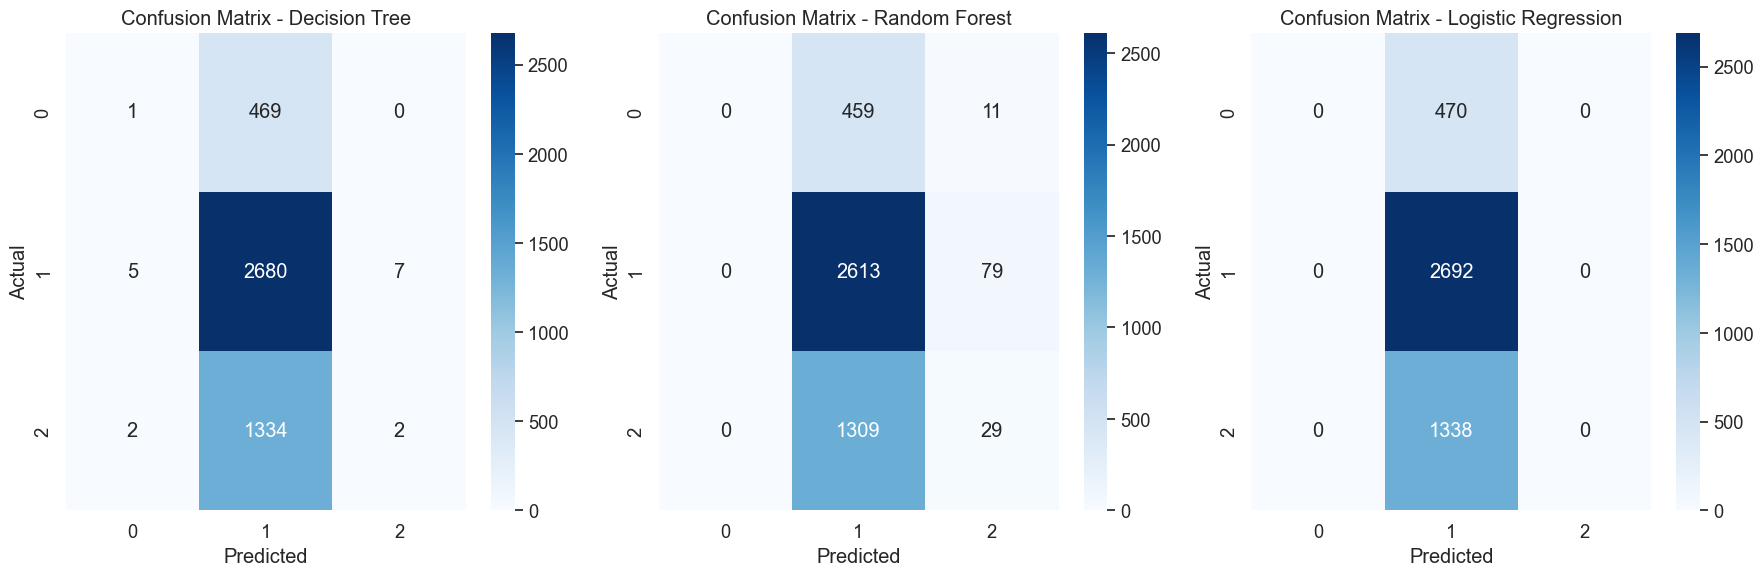

In [64]:
# Confusion Matrix for Decision Tree
tree_cm = confusion_matrix(y_test, tree_pred)
# Confusion Matrix for Random Forest
random_cm = confusion_matrix(y_test, random_pred)
# Confusion Matrix for Logistic Regression
logistic_cm = confusion_matrix(y_test, y_pred)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# for Decision Tree
sns.heatmap(tree_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# for Random Forest
sns.heatmap(random_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# for Logistic Regression
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Confusion Matrix - Logistic Regression')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


### Performing hyperparameter tuning for a Decision Tree classifier
To find the best combination of parameters for your Decision Tree, improving its performance on unseen data.

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for Decision Tree: ", grid_search.best_params_)


Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}


### Feature Importance and Selection
Identifying which features are most important to the model and selecting only the most impactful ones.

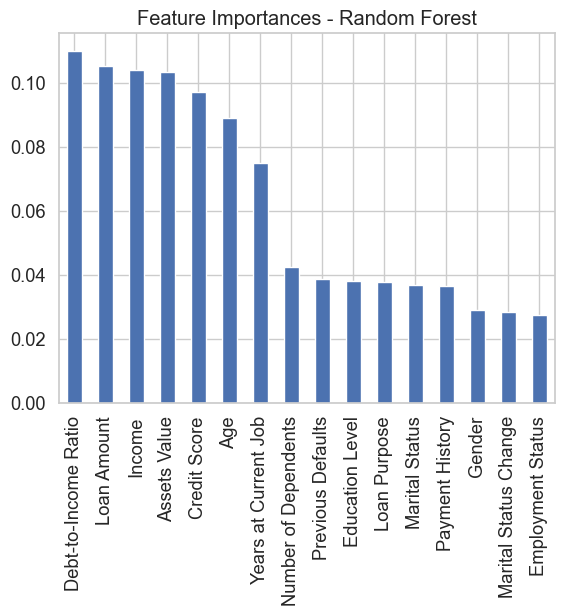

In [66]:
feature_importances = pd.Series(random.feature_importances_, index=features)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances - Random Forest')
plt.show()

### Use SHAP to explain explain the predictions of 3 models

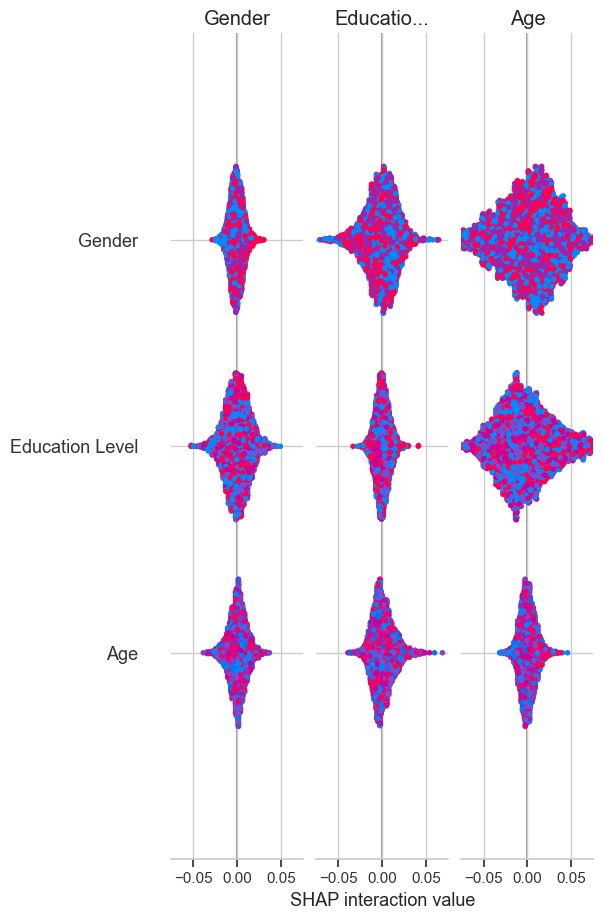

In [70]:
import shap

# Random Forest in SHAP explanation
explainer = shap.TreeExplainer(random)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,max_display=10)


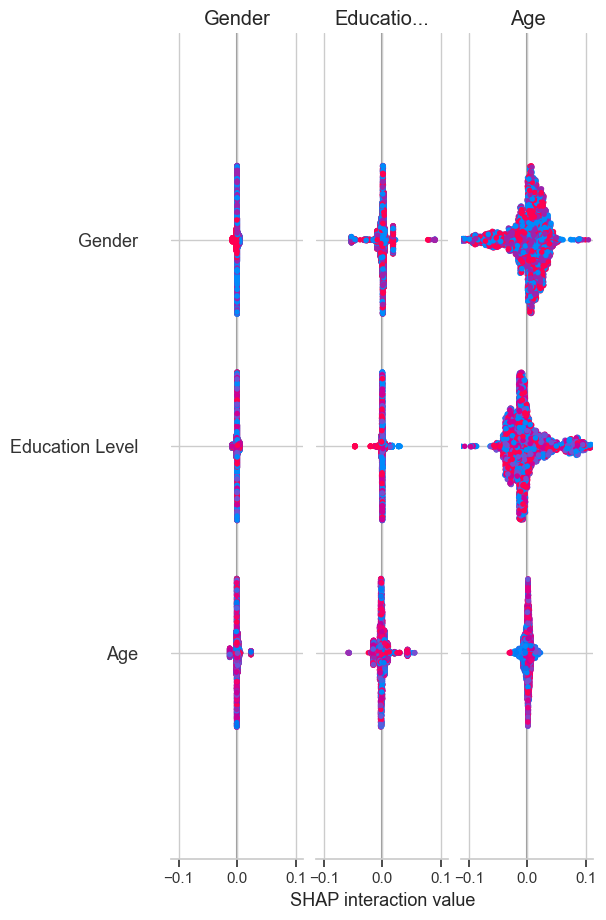

In [68]:
# Decision Tree in SHAP explanation
explainer_tree = shap.TreeExplainer(tree)  
shap_values_tree = explainer_tree.shap_values(X_test)  
shap.summary_plot(shap_values_tree, X_test, max_display=10)  

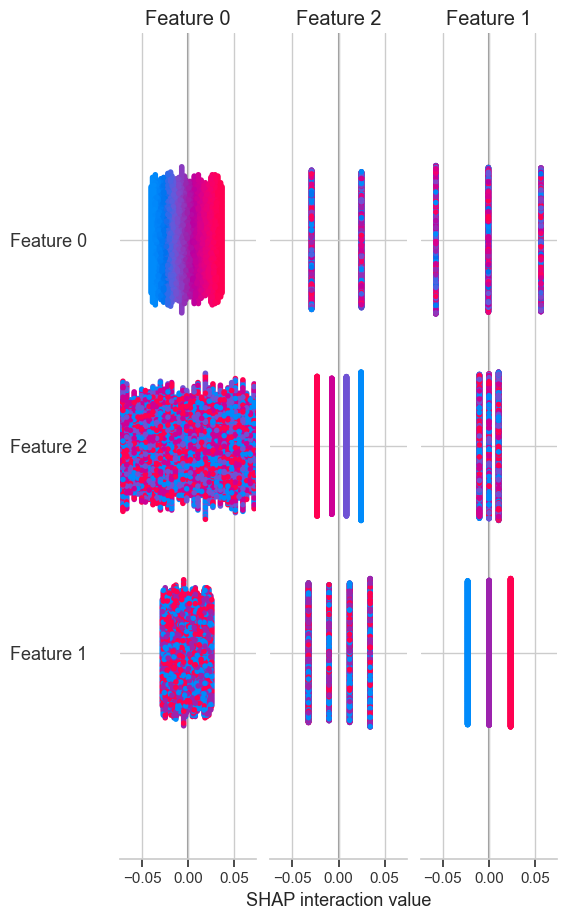

In [69]:
# Logistic Regression in SHAP explanation
explainer_logistic = shap.LinearExplainer(logist, X_train_scaled)  
shap_values_logistic = explainer_logistic.shap_values(X_test_scaled)  
shap.summary_plot(shap_values_logistic, X_test_scaled, max_display=10)  
